# GRAVITY data reduction process: from raw data to science results


**Pablo Marcos-Arenal**

Centro de Astrobiología (INTA-CSIC)


This file intends to cover the full data reduction process and analysis of near-infrared K- band observations with the GRAVITY interferometer at Very Large Telescope Interferometer (VLTI) at the Paranal Observatory. 

These observations of Herbig Ae/Be stars provide with spatially and spectrally resolved data of their inner disks.

# Summary

* Jupyter
* Data processing & Calibration
* Post-processing
* Modelling
* Results and figures



# Jupyter
Jupyter environment, jupyter lab, conda
conection
presentation


In [3]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.

#%matplotlib inline

#%matplotlib qt

In [73]:
#Import modules
import numpy as np
import pandas as pd
import gravity_plots_generator as gpg
from gravi_plot_functions import *
import matplotlib.gridspec as gridspec

miV590Mon = gpg.InputStar('V590Mon')
miPDS281 = gpg.InputStar('PDS281')
miHD94509 = gpg.InputStar('HD94509')
miDGCir = gpg.InputStar('DGCir')
miHD141926 = gpg.InputStar('HD141926')

all_sources = [miV590Mon,miPDS281,miHD94509,miDGCir,miHD141926]


plot_figure = False
save_figure = False



# Data processing & Calibration



## Esoreflex processing
The esoreflex processing tool provides with a GUI. The esoreflex GUI can be launched using the following command. In case you rather prefer the python_tools to continue the processing, jump to section *Python Tools processing*. 

Different processing pipelines can be selected just opening the corresponding configuration archive (.kar or .xml) where the type of workflow processing, setup directories and global parameters are set.
It is necesary to set the ROOT_DATA_DIR parameter where all output products will be located. 
Output files are distributed in the generated directories:

- *reflex_book_keeping*
- *reflex_tmp_products*
- *reflex_logs*
- *reflex_end_products*


Input files must be placed at the RAWDATA_DIR (this directory can be a subdirectory in ROOT_DATA_DIR).
All directories in RAWDATA_DIR are searched for data, therefore ROOT_DATA_DIR (and its subdirectory *reflex_end_products* containing final output products) should NOT be inside RAWDATA_DIR in order to avoid recursive process. 

The CALIB_DATA_DIR parameter must be set with the path to the calibration data files, in case the whole calibration process is required. 



The *Animate at Runtime* option can be set at *Tools>Animate at Runtime...*, where *Delay for animation (Time (in ms) to hold highlight)* must be set, typically, to 100. 

In [39]:
cmd_esoreflex = "esoreflex"
returned_value = subprocess.call(cmd_esoreflex, shell=True)  # returns the exit code in unix
if returned_value != 0:
    print('An error occurred: ', returned_value)

NameError: name 'subprocess' is not defined

## Python Tools processing
### Dependencies
Python_tools package depends on (at least) the following libraries:

- future
- reportlab
- pdfrw
- matplotlib
- astropy
- scipy

All these libraries are installed at Anaconda environments as:

```console
conda install [library_name]
```

but these are included while setting python2 or python3 enviroments as in the following sections.



### Setting python3 environment
The Anaconda 3 and python 3 versions of the Python_tools for the processing and visualization have been tested and used for the processing of all the observations. This version would be the reference version for the processing from now on. 
In order to set the DRS_Gravity3 environment is needed to launch the following alias:

```console
use-DRS_gravity_python3
```
This alias launches the script *.use-anaconda3* that sets python 3 and DRS_gravity3 environments in anaconda3.



## Run gravity reduction recipe 
In this section described how to launch the python script (*run_gravi_reduce.py*) that performs the main part of the Gravity reduction process, including the following steps:

1. Trigger the recipe gravity_dark on all standalone DARK.
2. Trigger the recipe gravity_p2vm on all sequences of 1 x DARK, 4 x FLAT, 6 x P2VM, 1 x WAVE, 1 x
WAVESC.
3. Trigger the recipe gravity_vis on all OBJECT,* files.

The script will search for (static) calibrations in the current directory if any. It will also search in the upper
directory ../common_calibration/. The products are created in the reduced/ subdirectory.
Before triggering a recipe, the script writes the corresponding SOF and the esorex command in the reduced/
subdirectory.



The input data directory must be set in '--reduced-dir' unless it's the current working directory  

## Transfer Function calibration

Transfer function and trending can be then triggered with the *run_gravi_trend.py* script in the *reduced* directory.

NOTE: This script requires *use-DRS_gravity_python2* (and not use-DRS_gravity_python3) to run withour errors.

The script performs the following steps:
1. Trigger the recipe gravity_viscal on all *CAL_VIS.
2. Trigger the recipe gravity_viscal on all *SCI_VIS.
3. Produce trending plots to check the transfer function.
The products are created in the calibrated/ and trend/ subdirectories.

In [ ]:
#%cd /pcdisk/stark/pmarcos/Data/run_0102.C-0576_C/pytest/reduced8/reduced
#%cd /pcdisk/stark/pmarcos/Data/run_0102.C-0576_E/pytest3/data_with_raw_calibs/

cmd_useDRS_gravity_python2 = ". ~/.use-DRS_gravity_python2"
returned_value = subprocess.call(cmd_useDRS_gravity_python2, shell=True)  # returns the exit code in unix
if returned_value != 0:
    print('An error occurred: ', returned_value)


%cd $calibrated_dir
!python /pcdisk/stark/pmarcos/CAB/Development/python_tools/run_gravi_trend.py --gravity_viscal.force-calib=TRUE --reduced-dir=/pcdisk/stark/pmarcos/Data/run_0102.C-0576_E/pytest3/data_with_raw_calibs/reduced
#!python /pcdisk/stark/pmarcos/CAB/Development/python_tools/run_gravi_trend.py --gravity_viscal.force-calib=TRUE 

# Post-processing
The previously processed observation still need to get a post-processing calibration in order to retrieve some Bad-pixels effect and telluric lines. It will also be continuum-corrected afterwards.

First, the Flux and visibilities for each telescope unit is represented as a function of wavelength.

The calibration images do also need to get Bad-pixels correction.

### Flux
Plot of the flux for each of the units [U1,U2,U3,U4] and its averaged value. 
This plot outlines spurious lines that needs to be removed. 

In [74]:
miV590Mon.figure_flux_preprocessing(plot_figure, save_figure)
miPDS281.figure_flux_preprocessing(plot_figure, save_figure)
miDGCir.figure_flux_preprocessing(plot_figure, save_figure)
miHD94509.figure_flux_preprocessing(plot_figure, save_figure)
miHD141926.figure_flux_preprocessing(plot_figure, save_figure)

## Visibility full range

In [75]:
miV590Mon.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miPDS281.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miDGCir.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miHD94509.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miHD141926.figure_full_range_visibility_preprocessing(plot_figure, save_figure)

### Bad pixels removal
Using the previous figures as a reference, we will remove these sporeus lines coming from bad pixels adding signal to the spectrum and not coming from the observed source.

It is created a *bad pixel map* where every wavelength channel has a value of 1 if it is correct and 0 if it is associated to a bad pixel. 

It is applied *rejection\_criterium\_flux* to establish whether a difference between to datasets can be considered a bad pixel or not. 
We apply this criterium to fluxes and visibilities to cross-calibrate the rejection criterium. 

The *general\_rejection\_criterium* is applied to the final *bad\_pixel\_mask* to take in account both fluxes and visibilities rejection criteria as a whole.

These results are plotted in pixel maps where pixels associated to wavelength channels are distributed left to right and top to bottom to cover a rectangular map. 




In [76]:
miV590Mon.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miPDS281.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miHD94509.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miDGCir.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miHD141926.figure_badpixel_flux_preprocessing(plot_figure, save_figure)

### Bad Pixel removal from calibration spectra
In this case, there is also a replacement of Bad Pixels by NaN data, but those holes are now replaced by an interpolated value through convolution.
This cannot be the case in science image because we will be replacing observational data (which might be incorrect) by interpolated data. 
What we do is using NaN to make sure that we do not compute Bad Data in our wavelengths channels of interest.
For calibration data we do can replace bad data with interpolated data, specially in that wavelengths ranges where we are interested in but the calibrator matches with Bad pixels.

We use the averaged the flux of both observations in all telescope units to get the convolved flux. 
All fluxes (in both observations an all telescope units) are compared to this to remove bad pixels and substitute them by NaN. These are replaced afterwards by a new averaged flux (after bad pixels removal).  

In [77]:
miV590Mon.figure_badpixel_calibration_preprocessing(plot_figure, save_figure)
miPDS281.figure_badpixel_calibration_preprocessing(plot_figure, save_figure)
miHD94509.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)
miDGCir.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)
miHD141926.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)

<Figure size 1296x864 with 0 Axes>

### Bad Pixel removal from visibilities 
Outliers in visibilities are not necesarily removed in the previous bad pixel in flux
since outliers in different baselines seem not to be related to a common pixel map. 
Therefore all outliers are rejected based on a different criterium. 
Since there are no shifts in visibilities for any of our sources (see figures generated at figure_full_range_visibility_preprocessing() function), we can simply reject outliers > sigma_coefficient * standard deviation. 

This is similar to use a different bad pixel mask for each baseline


In [78]:
sigma_coefficient = 4

x_axis_lim = [1.98,2.45]
y_axis_lim = [0,0.5]
y_axis_lim = [-1,2]
miV590Mon.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.9,1.1]
y_axis_lim = [-1,2]
miPDS281.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.0,1.25]
y_axis_lim = [-1,2]
miHD94509.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.0,1]
y_axis_lim = [-1,2]
miDGCir.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.6,1.4]
y_axis_lim = [-2,4]
miHD141926.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)



### Remove HD94509 outliers manually
Negative values of $V^2$ in every baseline will be replaced by NaNs. This NaNs will be replaced afterwards.

In [ ]:
x_axis_lim = [2.167,2.171]


source = miHD94509
HD94509_rejection_limit = 0

#Calculate index of the plot limits         
index_lower_x_axis_lim = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[0]))
index_higher_x_axis_lim  = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[1]))

   
for  key, value in source.visibility2.items():
    #print(key,source.visibility2[key][index_lower_x_axis_lim:index_higher_x_axis_lim])
    for index in range(index_lower_x_axis_lim,index_higher_x_axis_lim):
        if source.visibility2[key][index]<HD94509_rejection_limit:
            source.visibility2[key][index] = np.NaN

              
fig, ax = plt.subplots()

# Plot subplots
ax.plot(source.wl_A, source.visibility2['U4U2'], "*-b",label='Mean (A,B)')
ax.set_title(source.source + ' V2')
ax.set_ylabel('$V^2$')
ax.set_xlim(x_axis_lim)


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(self.source) + "_outliers_removal" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
 

### Remove DGCir outlers manually
Negative values of $V^2$ will be replaced by NaNs. This NaNs will be replaced afterwards.

In [ ]:
x_axis_lim = [2.167,2.171]


source = miHD94509
HD94509_rejection_limit = 0

#Calculate index of the plot limits         
index_lower_x_axis_lim = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[0]))
index_higher_x_axis_lim  = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[1]))

   
for  key, value in source.visibility2.items():
    #print(key,source.visibility2[key][index_lower_x_axis_lim:index_higher_x_axis_lim])
    for index in range(index_lower_x_axis_lim,index_higher_x_axis_lim):
        if source.visibility2[key][index]<HD94509_rejection_limit:
            source.visibility2[key][index] = np.NaN

              
fig, ax = plt.subplots()

# Plot subplots
ax.plot(source.wl_A, source.visibility2['U4U2'], "*-b",label='Mean (A,B)')
ax.set_title(source.source + ' V2')
ax.set_ylabel('$V^2$')
ax.set_xlim(x_axis_lim)


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(self.source) + "_outliers_removal" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
 

### Replace NaN values in flux, visibilities and phases
Once the Bad Pixel removal is applied, NaN values sustitute these Bad Pixels positions. We verify that these NaN values doesn't correspond to spectral lines were science data is retrieved before replacing these NaN values by a convolved value around that position with the *replace_nans_by_interpolated_gaussian()* function in module *gravi_plot_functions*.

In [79]:

#Replace NaN in BPcorrected_flux 
miV590Mon.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miV590Mon.BPcorrected_flux,10)
miPDS281.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miPDS281.BPcorrected_flux,10)
miHD94509.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD94509.BPcorrected_flux,10)
miDGCir.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miDGCir.BPcorrected_flux,10)
miHD141926.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD141926.BPcorrected_flux,10)

#Replace NaN in visibility2 
for key,value in miV590Mon.visibility2.items():
    miV590Mon.visibility2[key]=replace_nans_by_interpolated_gaussian(miV590Mon.visibility2[key],5)
for key,value in miPDS281.visibility2.items():
    miPDS281.visibility2[key]=replace_nans_by_interpolated_gaussian(miPDS281.visibility2[key],5)
for key,value in miHD94509.visibility2.items():
    miHD94509.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD94509.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miDGCir.visibility2[key]=replace_nans_by_interpolated_gaussian(miDGCir.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miHD141926.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD141926.visibility2[key],5)

    
#Replace NaN in diff_phase 
for key,value in miV590Mon.diff_phase.items():
    miV590Mon.diff_phase[key]=replace_nans_by_interpolated_gaussian(miV590Mon.diff_phase[key],5)
for key,value in miPDS281.diff_phase.items():
    miPDS281.diff_phase[key]=replace_nans_by_interpolated_gaussian(miPDS281.diff_phase[key],5)
for key,value in miHD94509.diff_phase.items():
    miHD94509.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD94509.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miDGCir.diff_phase[key]=replace_nans_by_interpolated_gaussian(miDGCir.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miHD141926.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD141926.diff_phase[key],5)


### Telluric lines
The calibration flux is normalized to be used in telluric lines removal. 
The Flux is divided by this normalized calibration flux in order to retrieve continuum flux values around our spectral line of interest. 
The values of the spectral lines ($Br\gamma$ in our case) are not taken from the divided by normalized calibration flux since the calibration source also has its own emission line ($Br\gamma$) that shouldn't affect our spectral line of interest.

The corresponding plot is shown in the following section, together with the continuum measurement.


### Continuum Flux measurement
The continuum around our line of interest ($Br\gamma$) is measured in the flux data (after Bad-pixel removal) divided by the normalized calibration flux (Bad-pixel removed).
The following figure shows the wavelength range where the continuum is measured.

For the function *figure_flux_continuum_measurement()* is required to provide x_axis_lim, y_axis_lim.

It is required to provide the array *continuum_range*, where the first two elements are initial and final wavelengths of the left continuum range, while the last two elements are the initial and final wavelengths of the rigth continuum range.

It is also required to provide the *line_range* array with the initial and final wavelengths of the line to be writen to the final spectra.

> 📘
**NOTE:** Line is not divided by calibrator.

In [80]:
x_axis_lim = [2.135,2.195]
line_range=[2.16,2.17]

y_axis_lim =[0.75,1.75] 
continuum_range=[2.15,2.16,2.17,2.18]
line_range=[2.1636,2.17]
miV590Mon.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,1.75]
continuum_range=[2.14,2.16,2.17,2.19]
line_range=[2.1615,2.17]
miPDS281.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,1.75]
continuum_range=[2.15,2.163,2.17,2.183]
line_range=[2.1647,2.1684]
miHD94509.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,1.75]
continuum_range=[2.153,2.163,2.17,2.18]
line_range=[2.1644,2.1684]
miDGCir.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,2.1]
continuum_range=[2.14,2.16,2.17,2.19]
line_range=[2.1638,2.168]
miHD141926.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)


### Continuum Visibility measurement


In [81]:
x_axis_lim = [2.14,2.17]

#x_axis_lim = Brg
y_axis_lim = [0,0.5]
continuum_range=[2.141,2.1604]
miV590Mon.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.9,1.1]
continuum_range=[2.1552,2.1615]
miPDS281.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.75,1.25]
continuum_range=[2.1546,2.1635]
miHD94509.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.4,1]
continuum_range=[2.153,2.163]
miDGCir.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.0,1.5]
continuum_range=[2.153,2.163]
miHD141926.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



Estimation of continuum_visibility2: {'U4U3': 0.0734236275519012, 'U4U2': 0.052115271335270275, 'U4U1': 0.0620657145548404, 'U3U2': 0.2256363600725809, 'U3U1': 0.0910407599426889, 'U2U1': 0.15610686261080978}
Estimation of continuum_visibility2: {'U4U3': 0.9869426136013626, 'U4U2': 0.9979294357296853, 'U4U1': 0.9901091457661076, 'U3U2': 0.9913975584302737, 'U3U1': 0.9639725119852142, 'U2U1': 0.9870973698814869}
Estimation of continuum_visibility2: {'U4U3': 0.9670845185076212, 'U4U2': 0.9637276617310271, 'U4U1': 0.986061317618359, 'U3U2': 0.942031030034755, 'U3U1': 0.9552546181998847, 'U2U1': 0.9452608307220081}
Estimation of continuum_visibility2: {'U4U3': 0.7624048261725016, 'U4U2': 0.7080106011598197, 'U4U1': 0.6190412673931875, 'U3U2': 0.7764260111537833, 'U3U1': 0.6781236116937153, 'U2U1': 0.7890817709633369}
Estimation of continuum_visibility2: {'U4U3': 1.0669620264671607, 'U4U2': 0.9318745052442629, 'U4U1': 1.0382247202975368, 'U3U2': 0.9524466592647193, 'U3U1': 1.011490856209966

### Continuum Differential Phase measurement


In [82]:

#x_axis_lim = Brg
y_axis_lim = [-90,90.5]
continuum_range=[2.141,2.1604]
miV590Mon.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-7,7.5]
continuum_range=[2.131,2.161]
miPDS281.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-15,15]
continuum_range=[2.1485,2.1644]
miHD94509.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-10,10.5]
continuum_range=[2.153,2.163]
miDGCir.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-10,10.5]
continuum_range=[2.153,2.163]
miHD141926.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



Estimation of continuum_diff_phase: {'U4U3': -1.7671471562134968, 'U4U2': -4.868164038596291, 'U4U1': -0.5093354274715693, 'U3U2': -0.7788783303411719, 'U3U1': 0.5522183380264636, 'U2U1': -1.82159089459212}
Estimation of continuum_diff_phase: {'U4U3': -0.23913422072580204, 'U4U2': -0.2666691280973197, 'U4U1': -0.4569667833564637, 'U3U2': 0.40020396230266897, 'U3U1': 0.13687027956922293, 'U2U1': -0.019851983401508733}
Estimation of continuum_diff_phase: {'U4U3': -0.4039584757186603, 'U4U2': 0.1360908710199027, 'U4U1': -1.1724383255243254, 'U3U2': 1.0574286620629287, 'U3U1': 0.006174659947319583, 'U2U1': -0.12047089678110012}
Estimation of continuum_diff_phase: {'U4U3': -0.38191886233281025, 'U4U2': 0.44967015629570994, 'U4U1': -0.012199457647938061, 'U3U2': 0.030298511125451455, 'U3U1': -0.1177009425600204, 'U2U1': -0.6265975184017805}
Estimation of continuum_diff_phase: {'U4U3': -0.3711918374006018, 'U4U2': -0.29277168726458314, 'U4U1': 1.236824746310731, 'U3U2': 0.6844164011860485, 'U

In [ ]:
miV590Mon.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miPDS281.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miDGCir.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miHD94509.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miHD141926.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)

### $Br\gamma$ visibility measurement
For each source is required to select the range correspondign to the $Br\gamma$ line. This selected range is the same applied to generate OIFITS files to be input in the LITpro model.
The maximum value for the squared visibility is measured for each source in that range and named *line_visibility2*.


> ⚠️ Warning: If Continuum Removal is applied afterwards, *line_visibility2* will be overwriten.
> 



In [ ]:

plot_range = [2.16,2.17]

line_range = [2.1652,2.168]
miV590Mon.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1645,2.169]
miPDS281.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1652,2.168]
miHD94509.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1652,2.1677]
miDGCir.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1640,2.1677]
miHD141926.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

### Safe data to FITS file
Before appliying the continuum removal, the previous results are saved to FITS file to check applicability of  continuum removal process (see below).

In [83]:
output_filename = "before_cont_removal"

miV590Mon.write_to_files(output_filename)
miPDS281.write_to_files(output_filename)
miHD94509.write_to_files(output_filename)
miDGCir.write_to_files(output_filename)
miHD141926.write_to_files(output_filename)


### Continuum removal
Once the continuum around $Br\gamma$ is measured, we applied the continuum_corrector function to retrieve the flux and visibility of the line ($F_l$ and $V_l^2$, respectively).

This function provides the continuum corrected differential phase and visibility of a spectral line, and their errors.
See Eqs. (2) and (3) in Kraus et al. 2012, ApJ, 744, 19.

$$F_l^2 V_l^2 = F^2 V^2 + F_c^2 V_c^2 - 2 · FV · F_c V_c ·\cos\phi$$
$$\sin\phi_l = \sin\phi\frac{\mid FV\mid}{\mid F_l V_l \mid}$$
$$F_l = F - F_c$$

The function is call into the *figure_continuum_corrector()* function as:

*continuum_corrector(wavelength, F, error_F, V2, V2_error, phase, phase_error, cont_F, cont_V2, result_Vl2, result_phasel)*

while *figure_continuum_corrector()* requires x_axis_lim, y_axis_lim and line_range (array with the wavelengths of the line range borders). In order to set these values, check *figure_flux_continuum_measurement()* to evaluate the line range to select.

In [84]:
##Check figure_flux_continuum_measurement to evaluate the line range to select
#line_range=[2.16,2.17]
#
#
#line_range=[2.1636,2.17]
#x_axis_lim = [2.16,2.172]
#y_axis_lim = [0,1.2]
#miV590Mon.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure,save_figure)
#
#line_range=[2.1615,2.17]
#y_axis_lim = [0,3]
#miPDS281.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1647,2.1684]
#y_axis_lim = [0,5]
#miHD94509.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1644,2.1684]
#y_axis_lim = [0.4,1.2]
#y_axis_lim = [0,3]
#miDGCir.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1638,2.168]
#y_axis_lim = [0.6,1.4]
#y_axis_lim = [0,3]
#miHD141926.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#

In [85]:
output_filename = "continuum_removed"

miV590Mon.write_to_files(output_filename)
miPDS281.write_to_files(output_filename)
miHD94509.write_to_files(output_filename)
miDGCir.write_to_files(output_filename)
miHD141926.write_to_files(output_filename)

# Results 
### 3 plots: Flux, $V^2$ and differential phase for each baseline 



In [86]:

x_axis_lim = [2.159,2.173]
#x_axis_lim = [2.165,2.167]

flux_ylim=[0.9,1.5]
visibility_ylim = [0,0.4]
diff_phase_ylim = [-40,40]
flux_yticks=np.arange(1,1.6,0.4)
visibility_yticks =np.arange(0.1,0.35,0.1)
diff_phase_yticks=np.arange(-30,40,30)
miV590Mon.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim,flux_yticks,visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.85,1.2]
visibility_ylim = [0.6,1.2]
diff_phase_ylim = [-5,5]
flux_yticks=np.arange(1,1.2,0.1)
visibility_yticks =np.arange(0.8,1.4,0.2)
diff_phase_yticks =np.arange(-5,6,5)
miPDS281.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.9,1.5]
visibility_ylim = [0.6,1.3]
diff_phase_ylim = [-12.5,12]
flux_yticks=np.arange(1,1.6,0.4)
visibility_yticks =np.arange(0.8,1.3,0.2)
diff_phase_yticks =np.arange(-10,11,5)
miHD94509.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.9,1.6]
visibility_ylim = [0,1.15]
diff_phase_ylim = [-10,10]
flux_yticks=np.arange(1,1.6,0.4)
visibility_yticks =np.arange(0.2,1.1,0.2)
diff_phase_yticks =np.arange(-5,10,5)
miDGCir.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)


flux_ylim=[0.75,1.9]
visibility_ylim = [0.6,1.3]
diff_phase_ylim = [-10,10]
flux_yticks=np.arange(1,1.6,0.5)
visibility_yticks =np.arange(0.8,1.3,0.2)
diff_phase_yticks =np.arange(-5,10,5)
miHD141926.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)



### Full bandwidth flux plot
This plot shows the full bandwidth of the science observation and a embeded zoom-in picture of the $Br\gamma$ region. The full picture includes science and calibrator relative in that region. 


In [87]:

x_axis_lim = [1.98,2.46]
flux_ylim = [0,18000] 
zoom_lower_xlim =2.163
zoom_higher_xlim = 2.170
zoom_ylim = [10000,18000] 
save_figure = False
miHD141926.figure_full_bandwidth_flux(x_axis_lim,flux_ylim, zoom_lower_xlim,zoom_higher_xlim,zoom_ylim,plot_figure, save_figure)


### Closure Phase

In [88]:
fig = plt.figure(figsize =([14, 12])) 

gs = gridspec.GridSpec(3, 4, wspace = 0.5, hspace = 0.3) 
  
ax1 = plt.subplot(gs[0, 0:2]) 
ax2 = plt.subplot(gs[0, 2:4]) 
ax3 = plt.subplot(gs[1, 0:2]) 
ax4 = plt.subplot(gs[1, 2:4]) 
  
ax5 = plt.subplot(gs[2, 1:3]) 
axes = [ax1, ax2, ax3, ax4, ax5]
j=0

for source in all_sources:
    #Plot closure phases
    for  key, value in source.phase_closure.items():
        axes[j].plot(source.wl_A,source.phase_closure[key], alpha=0.6, label=key)
    
        axes[j].legend(loc=1, fontsize = 8) # upper left corner
        axes[j].set_ylabel('Closure phase (deg)', fontsize = 10)
        axes[j].set_xlabel('Wavelength ($\mu m$)', fontsize = 10)
        axes[j].set_title(str(source.source), fontsize=12)  
        axes[j].set_xlim([2.14,2.19]) 
        axes[j].set_ylim([-12,12])
        axes[j].axvline(miHD94509.Brg, color="green", lw=1, ls='-')

    j=j+1

      
#Save figure to disk
if save_figure:
    fig.savefig("./figures/closure_phases_Brg.eps", dpi=300)

#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



### u,v coverage


In [89]:
#Plot u,v coverages for each pair of observations of each source.
#fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

fig = plt.figure(figsize =([14, 12])) 
        
gs = gridspec.GridSpec(3, 4, wspace = 0.5, hspace = 0.3) 
  
ax1 = plt.subplot(gs[0, 0:2]) 
ax2 = plt.subplot(gs[0, 2:4]) 
ax3 = plt.subplot(gs[1, 0:2]) 
ax4 = plt.subplot(gs[1, 2:4]) 
  
ax5 = plt.subplot(gs[2, 1:3]) 
axes = [ax1, ax2, ax3, ax4, ax5]
j=0

for source in all_sources:
    #Plot scatter (u,v) coverage
    for  key, value in source.uV2_A.items():
        axes[j].scatter( source.uV2_A[key],source.vV2_A[key],  marker="o", color='blue', facecolor="none", s=100, label='Obs. A' if key == 'U4U3' else "")
        axes[j].scatter( source.uV2_B[key],source.vV2_B[key],  marker="o", color='red' , facecolor="none", s=100, label='Obs. B' if key == 'U4U3' else "")
        axes[j].scatter(-source.uV2_A[key],-source.vV2_A[key], marker="o", color='blue', facecolor="none", s=100)
        axes[j].scatter(-source.uV2_B[key],-source.vV2_B[key], marker="o", color='red' , facecolor="none", s=100)
    
        axes[j].axhline(0, color="black", lw=1, ls='-')
        axes[j].axvline(0, color="black", lw=1, ls='-')
        axes[j].set_xlabel('u (m)', fontsize = 12)
        axes[j].set_ylabel('v (m)', fontsize = 12)
        axes[j].set_xlim([-140,140])
        axes[j].set_ylim([-140,140])
        axes[j].legend(loc=2) # upper left corner


        axes[j].set_title(str(source.source), fontsize=12) 


    j=j+1

      
#Save figure to disk
if save_figure:
    fig.savefig("./figures/all_sources_u_v_coverage.eps", dpi=300) 

#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
               




# Modelling
## LITpro input files
Once the processing itself is completed, we used the OIFITS Library to merge the final FITS data products in one single *OIFITS* file. 
This is not required for the python processing or visualization, but will be required for the LITpro modelling. 

### Continuum 
#### V590Mon Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2150 --wave-max=2160 copy_V590Mon.fits continuum_V590Mon_left.fits 
oifits-filter --wave-min=2170 --wave-max=2180 copy_V590Mon.fits continuum_V590Mon_right.fits 

oifits-merge merged_continuum_V590Mon.oifits continuum_V590Mon_left.fits continuum_V590Mon_right.fits
```

#### PDS281 Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2140 --wave-max=2160 copy_PDS281.fits continuum_PDS281_left.fits 
oifits-filter --wave-min=2170 --wave-max=2190 copy_PDS281.fits continuum_PDS281_right.fits 

oifits-merge merged_continuum_PDS281.oifits continuum_PDS281_left.fits continuum_PDS281_right.fits
```

#### HD94509 Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2150 --wave-max=2163 copy_HD94509.fits continuum_HD94509_left.fits 
oifits-filter --wave-min=2170 --wave-max=2183 copy_HD94509.fits continuum_HD94509_right.fits 

oifits-merge merged_continuum_HD94509.oifits continuum_HD94509_left.fits continuum_HD94509_right.fits
```

#### DGCir Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2153 --wave-max=2163 copy_DGCir.fits continuum_DGCir_left.fits 
oifits-filter --wave-min=2170 --wave-max=2180 copy_DGCir.fits continuum_DGCir_right.fits 

oifits-merge merged_continuum_DGCir.oifits continuum_DGCir_left.fits continuum_DGCir_right.fits
```

#### HD141926 Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2140 --wave-max=2160 copy_HD141926.fits continuum_HD141926_left.fits 
oifits-filter --wave-min=2170 --wave-max=2190 copy_HD141926.fits continuum_HD141926_right.fits 

oifits-merge merged_continuum_HD141926.oifits continuum_HD141926_left.fits continuum_HD141926_right.fits
```
### $Br\gamma$

#### V590Mon $Br\gamma$ crop and set to OIFITS
```console
oifits-filter --wave-min=2165.2 --wave-max=2168 copy_V590Mon.fits Brg_V590Mon.fits 

oifits-merge Brg_V590Mon.oifits Brg_V590Mon.fits Brg_V590Mon.fits
```

#### PDS281 $Br\gamma$ crop and set  to OIFITS
```console
oifits-filter --wave-min=2164.5 --wave-max=2169 copy_PDS281.fits Brg_PDS281.fits 

oifits-merge Brg_PDS281.oifits Brg_PDS281.fits Brg_PDS281.fits
```

#### HD 94509 $Br\gamma$ crop, merge and set to OIFITS
We do also want to apply the LITpro modelling to the two peaks of Brg in HD 94509, so we choose two especific spectral channels: Brg1 (2164.8-2166.3 A) and Brg2 (2166.3 - 2167.8 A). 
In the case of HD94509, the continuum removal process is providing with uncertain results, therefore we decide not to apply this process and use the HD94509_before_cont_removal.fits file.
First, it was applied the filter to these spectral channels in both processed files, and the merge is applied afterwards (to the same BrgX_HD94509.fits file) to generate a OIFITS file.
Therefore, it were applied the following commands:

```console
oifits-filter --wave-min=2164.8 --wave-max=2166.3 HD94509_before_cont_removal.fits Brg1_HD94509.fits
oifits-filter --wave-min=2166.3 --wave-max=2167.8 HD94509_before_cont_removal.fits Brg2_HD94509.fits

oifits-merge Brg1_HD94509.oifits Brg1_HD94509.fits Brg1_HD94509.fits 
oifits-merge Brg2_HD94509.oifits Brg2_HD94509.fits Brg2_HD94509.fits 
```
This process generates two different OIFits files, one for each $Br\gamma$ peak. Both files will be load into the LITpro tool in order to perform the modelling.

#### DGCir $Br\gamma$ crop and set to OIFITS
```console
oifits-filter --wave-min=2165.2 --wave-max=2167.7 copy_DGCir.fits Brg_DGCir.fits 

oifits-merge Brg_DGCir.oifits Brg_DGCir.fits Brg_DGCir.fits
```

#### HD141926 $Br\gamma$ crop and set to OIFITS
```console
oifits-filter --wave-min=21640 --wave-max=2167.7 copy_HD141926.fits Brg_HD141926.fits 

oifits-merge Brg_HD141926.oifits Brg_HD141926.fits Brg_HD141926.fits
```



The [OIFits Validator online tool](http://oival.jmmc.fr/index.html) can be used to verify the output files.

## LITpro Modelling
We modelled all our sources as gaussian elongated disks with a centered punctual source centered in the same position. DGCir also requires a background flux in its model to adjust to a good aproximated result. 

- LITpro INPUTS
- LIpro provides with OUTPUT

## Initial data

### Calculation of initial fluxes for source and disk in LITpro model
For calculating the initial fluxes in continuum, corresponding to source and disk in continuum, around $Br\gamma$, we use data of K band ($2.16\mu m$) excess for each source provided in Table 2 by [Vioque et al. (2018)](https://www.aanda.org/component/makeref/?task=show&type=html&doi=10.1051/0004-6361/201832870).

From that value we calculate the initial flux of source and disk to be applied in LITpro modelling, together with their minimum and maximum acotations. 


### V590Mon
There is no data of K_excess therefore we use SED provided by [Chumpon et al. 2020]() and [Guzmán et al. 2020]() to provide with the initial relative fluxes of source and disk. According to this figure it is applied 15\% due to the disk and 85\% due to the host star, and no maximum or minimum restrictions.
![V590Mon SED](./figures/SED_V590Mon.png)

### PDS281
There is no data of K_excess therefore we use SED provided by [Chumpon et al. 2020]() and [Guzmán et al. 2020]() to provide with the initial relative fluxes of source and disk.
According to this figure it is applied 0\% due to the disk and 100\% due to the host star, and no maximum or minimum restrictions.
![PDS281 SED](./figures/SED_PDS281.png)

|Name    | Kexcess| Fd0_min| Fd0  |Fd0_max  | F\*0_min|F\*0 | F\*0_max | 
| :-----:|:------:|:------:|:-----|:-------:|:-------:|:---:|:--------:|
|V590Mon |  -     | -      | 0.90 |    -    |    -    | 0.10|    -     |
|PDS281  |  -     | -      | 0.00 |    -    |    -    | 1.00|    -     |
|HD94509 |  1.53  | 0.27   | 0.35 | 0.41    | 0.59    | 0.65| 0.73     |
|DG Cir  | 30.63  | 0.964  | 0.968| 0.970   | 0.030   |0.032| 0.036    |
|HD141926|  2.31  | 0.52   | 0.57 | 0.61    | 0.39    | 0.43| 0.48     |




# LITpro Results
We get the following results in the LITpro model:

## V2 vs spectral frecuency
In the following function we get the baselines and the squared visibility as a function of each baseline.
This includes the model fitting results provided by LITpro as the red points.
The dashed line is also provided by LITpro, although in this case LITpro doesn't provide with a *.tsv* value but an image. We used the application [automeris.io](https://apps.automeris.io/wpd/) to retrieve these values from the image.

Here is represented V² as a function of the spatial frecuency 𝐵/𝜆 [𝑚/𝜇𝑚] given in [rad] units.

### V590Mon


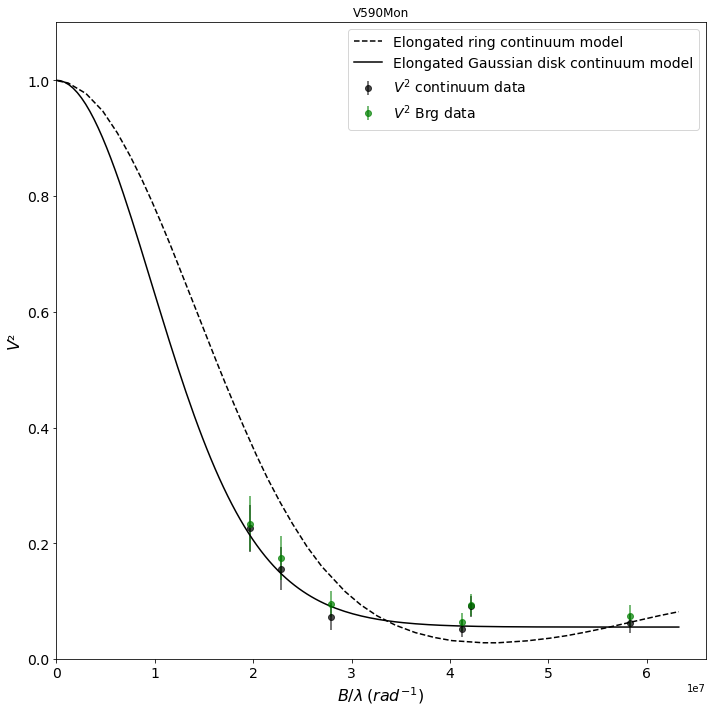

In [66]:
#Set object with previously calculated atributes
misource = miV590Mon

#Set plotting parameters
plot_figure=True
save_figure=False

#Set ploto limits
x_axis_lim = [-1000, 66000000]
y_axis_lim = [0,1.1]


# Gaussian disk model for Brg


# Read Elongated ring model data from automeris .csv file  
# (in the LITpro_output directory)  
ering_model_continuum_visibility2 = pd.read_csv("../LITpro/results_csv_tables/"+misource.source+"_ering_automeris_cont.csv", sep=';', header=0)

#Sort, just in case 
ering_model_continuum_visibility2=ering_model_continuum_visibility2.sort_values(by=['X_data'])

wave_cont_ering_model = ering_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_ering_model = ering_model_continuum_visibility2['Y_data'].to_numpy()


## Read fitting data from LITpro .tsv file  
## (in the same directory than gravi_plot_genereator.py)
LITpro_ering_continuum_visibility2 = pd.read_csv("../LITpro/results_csv_tables/"+misource.source+"_LITpro_model_ering_cont.tsv", sep='\t', header=3)
LITpro_ering_Brg_visibility2 = pd.read_csv("../LITpro/results_csv_tables/"+misource.source+"_LITpro_model_ering_Brg.tsv", sep='\t', header=3)
#Sort, just in case 
LITpro_ering_continuum_visibility2=LITpro_ering_continuum_visibility2.sort_values(by=['#x'])
LITpro_ering_Brg_visibility2=LITpro_ering_Brg_visibility2.sort_values(by=['#x'])


#ax[0,0].axes.errorbar(source.line_visibility2['U2U1'][0], source.line_visibility2['U2U1'][1],yerr=source.line_visibility2['U2U1'][2], fmt='r*-',label='Continuum corrected $V^2$')


#Generate plot
fig, ax = plt.subplots(figsize=(10, 10))

#Iteration in all telescopes baselines for observation data
i=0
for  key, value in misource.visibility2.items():
    # Plot errorbar with Observation Data
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.continuum_visibility2[key], yerr=misource.continuum_visibility2_error[key], c='black',fmt='o',alpha=0.7, capthick=2, label='$V^2$ continuum data' if i == 0 else "")
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.line_visibility2[key], yerr=misource.line_visibility2_error[key], c='green',fmt='o', alpha=0.7, capthick=2, label='$V^2$ Brg data' if i == 0 else "")

    # Models do not require baseline iteration 
    if i == 0:
        ax.plot(wave_cont_ering_model,V2_cont_ering_model, '--', color='black',label='Elongated ring continuum model')
        #ax.scatter(LITpro_ering_continuum_visibility2[['#x']], LITpro_ering_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='grey', marker="o", alpha=0.7, facecolor="none", s=100)
        #ax.scatter(LITpro_ering_Brg_visibility2[['#x']], LITpro_ering_Brg_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ model', color='red', marker='+',alpha=0.7, s=100)
    i=i+1



# Gaussian disk model for continuum
#Generate B_over_lambda (X-axis) linspace 
B_over_lambda = np.linspace(0, max(wave_cont_ering_model), 150)
         
#Parameters of the elongated Gaussian disk model
eGauss_FWHM = 6.1223 #  in mas           
eGauss_FWHM_rad = eGauss_FWHM/(206264.8*1000) # in radians 
flux_eGauss = 0.7647
gaussian_model_visibility = np.exp(-(np.pi*eGauss_FWHM_rad * B_over_lambda)**2/(4*np.log(2)))
#Punctual source component
flux_punct_gauss = 0.23531

#Visibilities calculation weighted by components flux
visibility2_Gauss_model = (flux_eGauss *gaussian_model_visibility + flux_punct_gauss * 1)**2

# Elongated Gaussian model curve as with the LITpro FWHM disk size and flux weight results
ax.plot(B_over_lambda,visibility2_Gauss_model, '-', color='black',label='Elongated Gaussian disk continuum model')


#Plot setup
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
ax.set_title(str(misource.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
        
#Ensure no overlapping in plots
fig.tight_layout()


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(misource.source) + "_V2_vs_spatial_frecuency" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



## DGCir


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

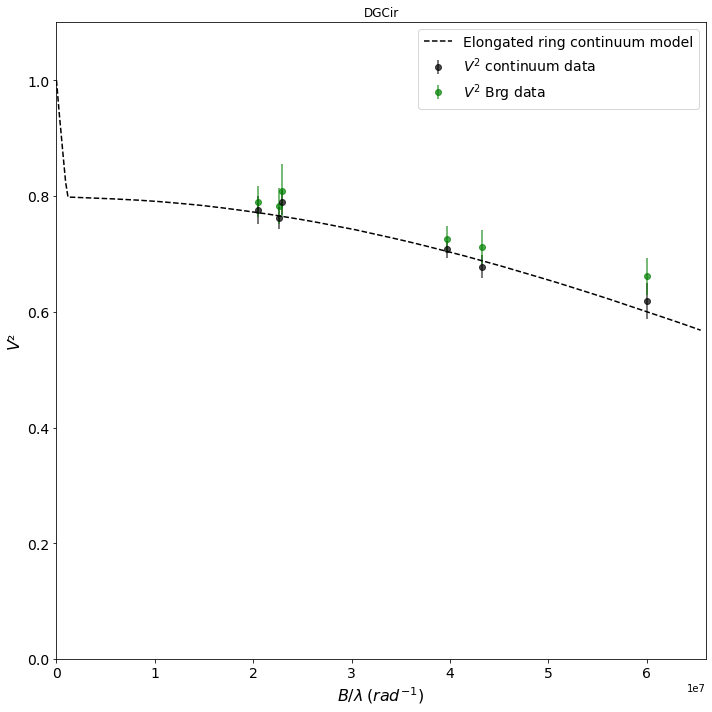

In [85]:
#Set object with previously calculated atributes
misource = miDGCir

#Set plotting parameters
plot_figure=True
save_figure=False

#Set ploto limits
x_axis_lim = [-1000, 66000000]
y_axis_lim = [0,1.1]


# Gaussian disk model for Brg


# Read Elongated ring model data from automeris .csv file  
# (in the LITpro_output directory)  
ering_model_continuum_visibility2 = pd.read_csv("../LITpro/results_csv_tables/"+misource.source+"_ering_automeris_cont.csv", sep=';', header=0)

#Sort, just in case 
ering_model_continuum_visibility2=ering_model_continuum_visibility2.sort_values(by=['X_data'])

wave_cont_ering_model = ering_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_ering_model = ering_model_continuum_visibility2['Y_data'].to_numpy()


## Read fitting data from LITpro .tsv file  
## (in the same directory than gravi_plot_genereator.py)
LITpro_ering_continuum_visibility2 = pd.read_csv("../LITpro/results_csv_tables/"+misource.source+"_LITpro_model_ering_cont.tsv", sep='\t', header=3)
LITpro_ering_Brg_visibility2 = pd.read_csv("../LITpro/results_csv_tables/"+misource.source+"_LITpro_model_ering_Brg.tsv", sep='\t', header=3)
#Sort, just in case 
LITpro_ering_continuum_visibility2=LITpro_ering_continuum_visibility2.sort_values(by=['#x'])
LITpro_ering_Brg_visibility2=LITpro_ering_Brg_visibility2.sort_values(by=['#x'])


#ax[0,0].axes.errorbar(source.line_visibility2['U2U1'][0], source.line_visibility2['U2U1'][1],yerr=source.line_visibility2['U2U1'][2], fmt='r*-',label='Continuum corrected $V^2$')


#Generate plot
fig, ax = plt.subplots(figsize=(10, 10))

#Iteration in all telescopes baselines for observation data
i=0
for  key, value in misource.visibility2.items():
    # Plot errorbar with Observation Data
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.continuum_visibility2[key], yerr=misource.continuum_visibility2_error[key], c='black',fmt='o',alpha=0.7, capthick=2, label='$V^2$ continuum data' if i == 0 else "")
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.line_visibility2[key], yerr=misource.line_visibility2_error[key], c='green',fmt='o', alpha=0.7, capthick=2, label='$V^2$ Brg data' if i == 0 else "")

    # Models do not require baseline iteration 
    if i == 0:
        ax.plot(wave_cont_ering_model,V2_cont_ering_model, '--', color='black',label='Elongated ring continuum model')
        #ax.scatter(LITpro_ering_continuum_visibility2[['#x']], LITpro_ering_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='grey', marker="o", alpha=0.7, facecolor="none", s=100)
        #ax.scatter(LITpro_ering_Brg_visibility2[['#x']], LITpro_ering_Brg_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ model', color='red', marker='+',alpha=0.7, s=100)
    i=i+1



# Gaussian disk model for continuum
#Generate B_over_lambda (X-axis) linspace 
B_over_lambda = np.linspace(0, max(wave_cont_ering_model), 150)
         
#Parameters of the elongated Gaussian disk model
eGauss_FWHM = 0.79068 #  in mas           
eGauss_FWHM_rad = eGauss_FWHM/(206264.8*1000) # in radians 
flux_eGauss = 0.68266
gaussian_model_visibility = np.exp(-(np.pi*eGauss_FWHM_rad * B_over_lambda)**2/(4*np.log(2)))
#Punctual source component
flux_punct_gauss = 0.2

#Background component
flux_background = 0.009312
#if B_over_lambda = 0:
#    background_visibility = 1
#else:
#    background_visibility = 0


#Visibilities calculation weighted by components flux
#visibility2_Gauss_model = (flux_eGauss *gaussian_model_visibility + flux_punct_gauss * 1+ flux_background *background_visibility)**2

# Elongated Gaussian model curve as with the LITpro FWHM disk size and flux weight results
#ax.plot(B_over_lambda,visibility2_Gauss_model, '-', color='black',label='Elongated Gaussian disk continuum model')


#Plot setup
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
ax.set_title(str(misource.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
        
#Ensure no overlapping in plots
fig.tight_layout()


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(misource.source) + "_V2_vs_spatial_frecuency" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



In [90]:
save_figure=False

x_axis_lim = [0, 65000000]

y_axis_lim = [0,1.1]
miV590Mon.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)

y_axis_lim = [0.8,1.1]
miPDS281.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)

y_axis_lim = [0.4,1.1]
#miHD94509.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)

y_axis_lim = [0.4,1.1]
miDGCir.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)

x_axis_lim = [0, 17000000]
y_axis_lim = [0.8,1.1]
miHD141926.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)

### Specific plot for HD94509 with two separated $Br\gamma$ lines

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


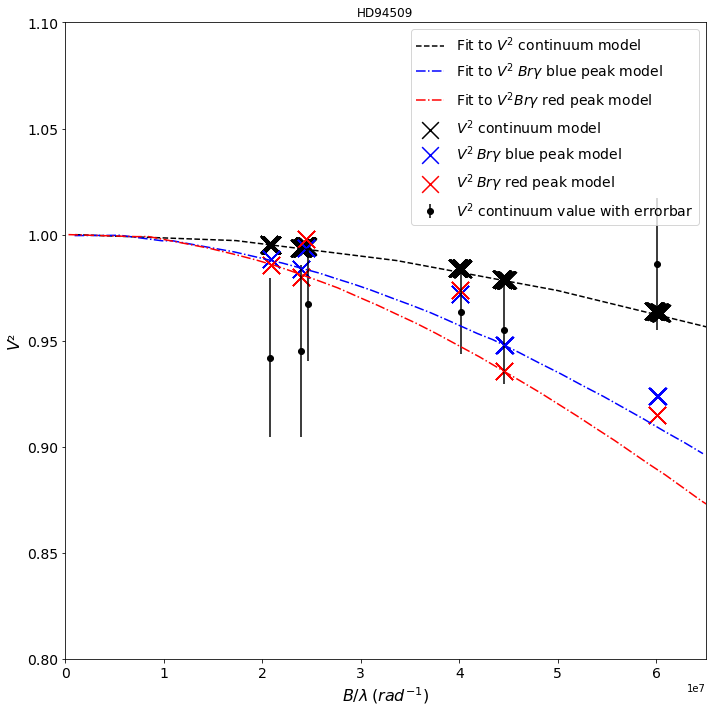

In [91]:

import pandas as pd
from scipy.interpolate import interp1d

save_figure=True

x_axis_lim = [0, 65000000]
y_axis_lim = [0.8,1.1]



"""
In this function is represented V² as a function of the spatial frecuency 𝐵/𝜆 [𝑚/𝜇𝑚] given in [rad] units.

"""

##Get baselines values B/lambda 
baseline_A = {}
baseline_B = {}
baseline = {}
for  key, value in miHD94509.uV2_A.items():
    baseline_A[key] = sqrt(miHD94509.uV2_A[key]**2 + miHD94509.vV2_A[key]**2)
    baseline_B[key] = sqrt(miHD94509.uV2_B[key]**2 + miHD94509.vV2_B[key]**2)
    baseline[key] = mean([baseline_A[key],baseline_B[key]])


# Read fitting data from automeris .csv file  
# (in the LITpro_output directory)  
LITpro_continuum_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_cont_LITpro_fit.tsv", sep='\t', header=3)
LITpro_Brg1_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_Brg1_LITpro_fit.tsv", sep='\t', header=3)
LITpro_Brg2_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_Brg2_LITpro_fit.tsv", sep='\t', header=3)

LITpro_continuum_visibility2=LITpro_continuum_visibility2.sort_values(by=['#x'])
wave_LITpro = LITpro_continuum_visibility2['#x'].to_numpy()
modelValue_LITpro = LITpro_continuum_visibility2['modelValue'].to_numpy()

LITpro_Brg1_visibility2=LITpro_Brg1_visibility2.sort_values(by=['#x'])
LITpro_Brg2_visibility2=LITpro_Brg2_visibility2.sort_values(by=['#x'])
#wave_LITpro = LITpro_Brg_visibility2['#x'].to_numpy()
#modelValue_LITpro = LITpro_Brg_visibility2['modelValue'].to_numpy()

# Read fitting data from LITpro .tsv file  
# (in the same directory than gravi_plot_genereator.py)
fitted_continuum_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_automeris_cont.csv", sep=';', header=0)
fitted_Brg1_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_automeris_Brg_1.csv", sep=';', header=0)
fitted_Brg2_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_automeris_Brg_2.csv", sep=';', header=0)

#Sort, just in case 
fitted_continuum_visibility2=fitted_continuum_visibility2.sort_values(by=['X_data'])
fitted_Brg1_visibility2=fitted_Brg1_visibility2.sort_values(by=['X_data'])
fitted_Brg2_visibility2=fitted_Brg2_visibility2.sort_values(by=['X_data'])

wave_cont = fitted_continuum_visibility2['X_data'].to_numpy()
modelValue_cont = fitted_continuum_visibility2['Y_data'].to_numpy()

#Generate interpolated curve to fit values
interpolated_modelValue_cont = interp1d(wave_cont, modelValue_cont, kind='cubic')
wave_cont_oversampled = np.linspace(min(wave_cont), max(wave_cont), num=5, endpoint=True)


wave_Brg1 = fitted_Brg1_visibility2['X_data'].to_numpy()
modelValue_Brg1 = fitted_Brg1_visibility2['Y_data'].to_numpy()
wave_Brg2 = fitted_Brg2_visibility2['X_data'].to_numpy()
modelValue_Brg2 = fitted_Brg2_visibility2['Y_data'].to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))

i=0
for  key, value in miHD94509.visibility2.items():
    #Generate interpolated model fitting values
    ax.errorbar(baseline[key]*1000000/miHD94509.Brg, miHD94509.continuum_visibility2[key], yerr=miHD94509.continuum_visibility2_error[key], c='black',fmt='o', capthick=2, label='$V^2$ continuum value with errorbar' if i == 0 else "")
    
    if i == 0:
        #ax.plot(wave_cont,modelValue_cont, '--', color='black',label='Fit to $V^2$ continuum model')
        #ax.plot(wave_cont_oversampled,interpolated_modelValue_cont(wave_cont_oversampled), '-', color='green',label='TEST to $V^2$ continuum model')
        ax.plot(wave_cont_oversampled,interpolated_modelValue_cont(wave_cont_oversampled), '--', color='black',label='Fit to $V^2$ continuum model')
        ax.plot(wave_Brg1,modelValue_Brg1, '-.', color='blue',label='Fit to $V^2 \; Br\gamma$ blue peak model')
        ax.plot(wave_Brg2,modelValue_Brg2, '-.', color='red',label='Fit to $V^2 Br\gamma$ red peak model')
        #ax.scatter(fitted_continuum_visibility2[['#x']], fitted_continuum_visibility2[['dataValue']],label=' $V^2$ Data')
        ax.scatter(LITpro_continuum_visibility2[['#x']], LITpro_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='black', marker='x',s=280)
        ax.scatter(LITpro_Brg1_visibility2[['#x']], LITpro_Brg1_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ blue peak model', color='blue', marker='x',s=280)
        ax.scatter(LITpro_Brg2_visibility2[['#x']], LITpro_Brg2_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ red peak model', color='red', marker='x',s=280)

    i=i+1
 
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
ax.set_title(str(miHD94509.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
        
#Ensure no overlapping in plots
fig.tight_layout()


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(miHD94509.source) + "_V2_vs_spatial_frecuency" + ".eps", dpi=300)




## Setting star parameters in tables


In [92]:
#Setting star parameteres in dataframe

names = ['V590Mon','PDS281','HD94509','DGcir','HD141926']
log_luminosity=[1.38,3.59,2.99,1.58,4.74]


#Set Gaia distances in parsecs
distance_pc=[1722, 932, 1830, 833, 1340]
distance_pc_error_plus=[171, 47, 210, 52, 150]
distance_pc_error_minus=[160, 40, 150, 43,110]

#Set Meeus groups and JHK (as in Guzman-Diaz et al. 2020)
meeus_group=[ "I", "I", "II?", "I", "II"]
jhk_group=[ "J", ">Ks", ">Ks", "J", "J"]



## Gaussian elongated disk and punctual source

### Setting LITpro results



In [93]:
#Setting results in egauss_model_results dataframe
estimated_inner_disk=[0.172,9.015,5.377,0.388,15.156]
estimated_luminosity=[1.34,3.59,3.17,2.07,5.13]

#Set continuum LITpro modelled angular sizes (disk diameter) and errors(mas)
angular_size_cont = [5.96/2, 3.5/2, 0.45/2, 0.7/2, 0.4/2]
angular_size_cont_error = [0.4/2, 0.3/2, 2.03/2, 0.2/2, 3/2]

#Set Brg LITpro modelled angular sizes (disk diameter) and errors(mas)
angular_size_Brg = [6.16/2, 0.0/2, 0.013/2, 0.7/2,0.007/2]
angular_size_Brg_error = [0.18/2, 0.0/2, 48/2, 0.3/2,33/2]


#Set values in one single dataframe
egauss_model_results = pd.DataFrame(names,columns=['Name'])
egauss_model_results['log_luminosity']=pd.Series(log_luminosity)
egauss_model_results['estimated_inner_disk']=pd.Series(estimated_inner_disk)
egauss_model_results['estimated_luminosity']=pd.Series(estimated_luminosity)
egauss_model_results['distance_pc']=pd.Series(distance_pc)
egauss_model_results['distance_pc_error_plus']=pd.Series(distance_pc_error_plus)
egauss_model_results['distance_pc_error_minus']=pd.Series(distance_pc_error_minus)
egauss_model_results['angular_size_cont']=pd.Series(angular_size_cont)
egauss_model_results['angular_size_cont_error']=pd.Series(angular_size_cont_error)
egauss_model_results['angular_size_Brg']=pd.Series(angular_size_Brg)
egauss_model_results['angular_size_Brg_error']=pd.Series(angular_size_Brg_error)


### Disk Sizes
Using LITpro results on disk angular sizes (${\delta}[mas]$),  we calculate its disk radius ($d[au]$) from its distance ($D$) through the *disk_size_calculator(distance, angular_size)* function in *gravi_plot_functions* module.
The disk angular sizes (${\delta}[mas]$) provided by LITpro are given as FWHM of the minor axis of the elongated Gaussian. 
It is convention to use this FWHM as the diameter of the disk. 



In [94]:
#Calculate disk radius in au units
disk_radius_cont=[]
disk_radius_cont_error=[]
disk_radius_Brg=[]
disk_radius_Brg_error=[]

disk_radius_cont,  disk_radius_cont_error = disk_size_error_calculator(egauss_model_results['distance_pc'],egauss_model_results['distance_pc_error_plus'],egauss_model_results['angular_size_cont'],egauss_model_results['angular_size_cont_error'])
disk_radius_Brg,  disk_radius_Brg_error = disk_size_error_calculator(egauss_model_results['distance_pc'],egauss_model_results['distance_pc_error_plus'],egauss_model_results['angular_size_Brg'],egauss_model_results['angular_size_Brg_error'])


#Add disk radius calculated values to dataframe
egauss_model_results['disk_radius_cont']=pd.Series(disk_radius_cont)
egauss_model_results['disk_radius_cont_error']=pd.Series(disk_radius_cont_error)
egauss_model_results['disk_radius_Brg']=pd.Series(disk_radius_Brg)
egauss_model_results['disk_radius_Brg_error']=pd.Series(disk_radius_Brg_error)


### Gaussian disk inclination calculation
Use the *disk_inclination_calculator()* function to calculate disk inclinations and their errors. 


In [95]:
#CONTINUUM
#Set LITpro modelled elongation ratios and errors 

#Set continuum LITpro modelled elongation (mayor_axis/minor_axis) and errors
elongation_cont = [1.25,1.49,1.1,1.001,5]
elongation_cont_error = [0.03,0.12,0.6,0.06,8]

#Set Brg LITpro modelled elongation (mayor_axis/minor_axis) and errors
elongation_Brg = [1.00001, 1.00000001, 67, 1.77, 223]
elongation_Brg_error = [0.05,0.00000001,250000, 0.09, 1000000]


#Calculate disk inclination in [deg]
inclination_cont=[]
inclination_cont_error=[]
inclination_Brg=[]
inclination_Brg_error=[]

inclination_cont, inclination_cont_error = disk_inclination_calculator(elongation_cont, elongation_cont_error)
inclination_Brg, inclination_Brg_error = disk_inclination_calculator(elongation_Brg, elongation_Brg_error)


#Add disk radius calculated values to dataframe
egauss_model_results['inclination_cont']=pd.Series(inclination_cont)
egauss_model_results['inclination_cont_error']=pd.Series(inclination_cont_error)
egauss_model_results['inclination_Brg']=pd.Series(inclination_Brg)
egauss_model_results['inclination_Brg_error']=pd.Series(inclination_Brg_error)

#print(egauss_model_results)
print(egauss_model_results[['inclination_cont','inclination_cont_error','inclination_Brg','inclination_Brg_error']].to_markdown(showindex=False))
#print(egauss_model_results.to_latex(index=False))


|   inclination_cont |   inclination_cont_error |   inclination_Brg |   inclination_Brg_error |
|-------------------:|-------------------------:|------------------:|------------------------:|
|           36.8699  |                 1.9557   |        0.256233   |          143236         |
|           47.8448  |                 2.53826  |        0.00810285 |              28.6479    |
|           24.62    |               135.291    |       89.1448     |               0.710985  |
|            2.56128 |              1714.58     |       55.5997     |               0.771699  |
|           78.463   |                 0.763944 |       89.7431     |               0.0231692 |


### Disks radius as a function of luminosity

The luminosity of each of the stars is represented with its measured radius of the disk in the continuum,
$Br\gamma$ and the inner disk estimation by [Guzmán et al. 2020]().

The input to this function are the numpy array of sources name, logaritmic luminosity 
disk radius in continuum, disk radius in $Br\gamma$, logaritmic estimated luminosity and inner disk estimation.

These data are:
    
    
|Name    | Log(L) [$L_\odot$]| Continuum disk radius [mas]| Brg disk radius [mas]|Log(L) (estimated)[$L_\odot$]| disk radius (estimated) | 
|:------:|:------:|:------------------------:|:------------------:|:---------------:|:---------------------:|
|V590Mon |  1.38  |          5.96            |         6.16       |  1.34           |       0.172           |
|PDS281  |  3.59  |          3.5             |         -          |  3.59           |       9.015           |
|HD94509 |  2.99  |          0.45            |         0.013      |  3.17           |       5.377           |
|DG Cir  |  1.58  |          0.7             |         0.7        |  2.07           |       0.388           |
|HD141926|  4.74  |          0.4             |         0.007      |  5.13           |       15.156          |




## Ring and punctual source
### Setting LITpro RING results
Angular sizes in LITpro model for elongated ring is given as the minor internal diameter (therefore we divide by 2 to get the radius).

The sizes of the function in two orthogonal directions are given by the narrowest internal radius (MINOR\_INTERNAL\_DIAMETER) and by the ratio ELONG\_RATIO between the widest internal diameter and
MINOR\_INTERNAL\_DIAMETER, in the same way as for an ellipse:

$$ ELONG\_RATIO = MAJOR\_INTERNAL\_DIAMETER / MINOR\_INTERNAL\_DIAMETER $$

In the direction of MINOR_INTERNAL_DIAMETER, the external diameter is MINOR\_INTERNAL\_DIAMETER + WIDTH. In the direction of major_diameter, the width is magnified by the ratio ELONG_RATIO, so that the external diameter is the elongated MAJOR\_INTERNAL\_DIAMETER + ELONG\_RATIO * WIDTH.

MAJOR_AXIS_POS_ANGLE is measured in degrees, from the positive vertical semi-axis (i.e. North direction) towards to the positive horizontal semi-axis (i.e. East direction).  

For avoiding degenerescence, the domain of variation of MAJOR\_AXIS\_POS\_ANGLE is 180 degrees, for ex. from 0 to 180 degrees.


In [96]:
#Setting results in ering_model_results dataframe

#CONTINUUM
#Set continuum LITpro modelled elongation (mayor_axis/minor_axis) and errors
ring_elongation_cont = [1.537, 1, 1.0992, 1,1]
ring_elongation_cont_error = [0.0789, 0, 0.565, 0.0978,0.0493]
ering_flux_weight_star_cont = [0.27036, 1, 0.73, 0.03,0.48]
ering_flux_weight_star_cont_error = [0.0267, 0.0107, 4.44, 2.26,3.41]
ering_flux_weight_ring_cont = [0.72968, 0, 0.27, 0.964,0.52]
ering_flux_weight_ring_cont_error = [0.0718, 0.0107, 4.44, 2.26,3.41]
ering_flux_weight_bckg_cont = [np.NaN, np.NaN, np.NaN, 0.12762, np.NaN]
ering_flux_weight_bckg_cont_error = [np.NaN, np.NaN, np.NaN, 0.00812, np.NaN]
ering_major_axis_pos_angle_cont =[65.002, 0, 0, 0,0]
ering_major_axis_pos_angle_cont_error =[0.616, 0, 219, 3.88e+06,3.94e+06]
#Set continuum LITpro modelled angular sizes (ring diameter) and errors(mas)
ering_angular_size_cont = [x/2 for x in [0, 0, 0, 0, 0]]
ering_angular_size_cont_error = [x/2 for x in [1.58e+04, 0, 4.2e+05, 7.61e+04,2.5e+06]]
ering_width_cont =[3.4262, 0, 0.38008, 0.56075,1.8678]
ering_width_cont_error =[7.89e+03, 0, 2.1e+05, 3.8e+04,1.25e+06]


#Brg
#Set Brg LITpro modelled elongation (mayor_axis/minor_axis) and errors
ring_elongation_Brg = [1.8274, 1, 1.5199, 1,np.NaN]
ring_elongation_Brg_error = [0.242, 0, 2.17, 0.136,np.NaN]
ering_flux_weight_star_Brg = [0.29581, 1, 0.96788, 0.81315,np.NaN]
ering_flux_weight_star_Brg_error = [0.0218, 1.76e+06, 1.58, 0.168,np.NaN]
ering_flux_weight_ring_Brg = [0.70419, 0, 0.032119, 0.0971,np.NaN]
ering_flux_weight_ring_Brg_error = [0.0515, 1.76e+06, 1.58, 0.159,np.NaN]
ering_flux_weight_bckg_Brg = [np.NaN, np.NaN, np.NaN, 0.089755, np.NaN]
ering_flux_weight_bckg_Brg_error = [np.NaN, np.NaN, np.NaN, 0.009, np.NaN]
ering_major_axis_pos_angle_Brg =[63.051, 0, 0, 0,np.NaN]
ering_major_axis_pos_angle_Brg_error =[1.22, 0, 255, 5.37e+05,np.NaN]
#Set Brg LITpro modelled angular sizes (ring diameter) and errors(mas)
ering_angular_size_Brg = [0, 0, 0.12372, 1.6753e-12,np.NaN]
ering_angular_size_Brg_error = [3.85e+04, 0, 2.51e+04, 1.89e+06,np.NaN]
ering_width_Brg =[2.9845, 0, 5.5499, 2.0142,np.NaN]
ering_width_Brg_error =[1.93e+04, 0, 1.26e+04, 9.45e+05,np.NaN]


#Set values in one single dataframe
ering_model_results = pd.DataFrame(names,columns=['Name'])
ering_model_results['log_luminosity']=pd.Series(log_luminosity)
ering_model_results['distance_pc']=pd.Series(distance_pc)
ering_model_results['distance_pc_error_plus']=pd.Series(distance_pc_error_plus)
ering_model_results['distance_pc_error_minus']=pd.Series(distance_pc_error_minus)
ering_model_results['angular_size_cont']=pd.Series(ering_angular_size_cont)
ering_model_results['angular_size_cont_error']=pd.Series(ering_angular_size_cont_error)
ering_model_results['angular_size_Brg']=pd.Series(ering_angular_size_Brg)
ering_model_results['angular_size_Brg_error']=pd.Series(ering_angular_size_Brg_error)
ering_model_results['width_cont']=pd.Series(ering_width_cont)
ering_model_results['width_cont_error']=pd.Series(ering_width_cont_error)
ering_model_results['width_Brg']=pd.Series(ering_width_Brg)
ering_model_results['width_Brg_error']=pd.Series(ering_width_Brg_error)
ering_model_results['elongation_cont']=pd.Series(ring_elongation_cont)
ering_model_results['elongation_cont_error']=pd.Series(ring_elongation_cont_error)
ering_model_results['elongation_Brg']=pd.Series(ring_elongation_Brg)
ering_model_results['elongation_Brg_error']=pd.Series(ring_elongation_cont_error)
ering_model_results['major_axis_pos_angle_cont']=pd.Series(ering_major_axis_pos_angle_cont)
ering_model_results['major_axis_pos_angle_cont_error']=pd.Series(ering_major_axis_pos_angle_cont_error)
ering_model_results['major_axis_pos_angle_Brg']=pd.Series(ering_major_axis_pos_angle_Brg)
ering_model_results['major_axis_pos_angle_Brg_error']=pd.Series(ering_major_axis_pos_angle_Brg_error)

ering_model_results['ering_flux_weight_star_cont']=pd.Series(ering_flux_weight_star_cont )
ering_model_results['ering_flux_weight_star_cont_error']=pd.Series(ering_flux_weight_star_cont_error)
ering_model_results['ering_flux_weight_ring_cont']=pd.Series(ering_flux_weight_ring_cont )
ering_model_results['ering_flux_weight_ring_cont_error']=pd.Series(ering_flux_weight_ring_cont_error)
ering_model_results['ering_flux_weight_bckg_cont']=pd.Series(ering_flux_weight_bckg_cont)
ering_model_results['ering_flux_weight_bckg_cont_error']=pd.Series(ering_flux_weight_bckg_cont_error)
ering_model_results['ering_flux_weight_star_Brg']=pd.Series(ering_flux_weight_star_Brg)
ering_model_results['ering_flux_weight_star_Brg_error']=pd.Series(ering_flux_weight_star_Brg_error)
ering_model_results['ering_flux_weight_ring_Brg']=pd.Series(ering_flux_weight_ring_Brg)
ering_model_results['ering_flux_weight_ring_Brg_error']=pd.Series(ering_flux_weight_ring_Brg_error)
ering_model_results['ering_flux_weight_bckg_Brg']=pd.Series(ering_flux_weight_bckg_Brg)
ering_model_results['ering_flux_weight_bckg_Brg_error']=pd.Series(ering_flux_weight_bckg_Brg_error)


### Ring Sizes
Using LITpro results on ring angular sizes (${\delta}[mas]$),  we calculate its ring radius ($d[au]$) from its distance ($D$) through the *disk_size_calculator(distance, angular_size)* function in *gravi_plot_functions* module.
The ring angular sizes (${\delta}[mas]$) provided by LITpro are given for the minor axis of the elongated ring. 


In [97]:
#Calculate ring radius in au units
ring_radius_cont=[]
ring_radius_cont_error=[]
ring_radius_Brg=[]
ring_radius_Brg_error=[]

ring_radius_cont,  ring_radius_cont_error = disk_size_error_calculator(ering_model_results['distance_pc'],ering_model_results['distance_pc_error_plus'],ering_model_results['angular_size_cont'],ering_model_results['angular_size_cont_error'])
ring_radius_Brg,  ring_radius_Brg_error = disk_size_error_calculator(ering_model_results['distance_pc'],ering_model_results['distance_pc_error_plus'],ering_model_results['angular_size_Brg'],egauss_model_results['angular_size_Brg_error'])


#Add ring radius calculated values to dataframe
ering_model_results['ring_radius_cont']=pd.Series(ring_radius_cont)
ering_model_results['ring_radius_cont_error']=pd.Series(ring_radius_cont_error)
ering_model_results['ring_radius_Brg']=pd.Series(ring_radius_Brg)
ering_model_results['ring_radius_Brg_error']=pd.Series(ring_radius_Brg_error)

#print(egauss_model_results)
#print(egauss_model_results[['ring_radius_Brg','ring_radius_Brg_error']].to_markdown(showindex=False))
#print(egauss_model_results.to_latex(index=False))

### Ring  inclination calculation
Use the *disk_inclination_calculator()* function to calculate disk inclinations and their errors. 


In [98]:
#Calculate ring inclination in [deg]
ring_inclination_cont=[]
ring_inclination_cont_error=[]
ring_inclination_Brg=[]
ring_inclination_Brg_error=[]

ring_inclination_cont, inclination_cont_error = disk_inclination_calculator(ring_elongation_cont, ring_elongation_cont_error)
ring_inclination_Brg, inclination_Brg_error = disk_inclination_calculator(ring_elongation_Brg, ring_elongation_Brg_error)


#Add disk radius calculated values to dataframe
ering_model_results['inclination_cont']=pd.Series(ring_inclination_cont)
ering_model_results['inclination_cont_error']=pd.Series(ring_inclination_cont_error)
ering_model_results['inclination_Brg']=pd.Series(ring_inclination_Brg)
ering_model_results['inclination_Brg_error']=pd.Series(ring_inclination_Brg_error)

#print(ring_model_results)
print(ering_model_results[['inclination_cont','inclination_cont_error','inclination_Brg','inclination_Brg_error']].to_markdown(showindex=False))
#print(ring_model_results.to_latex(index=False))


|   inclination_cont |   inclination_cont_error |   inclination_Brg |   inclination_Brg_error |
|-------------------:|-------------------------:|------------------:|------------------------:|
|            49.4118 |                      nan |           56.8231 |                     nan |
|             0      |                      nan |            0      |                     nan |
|            24.5288 |                      nan |           48.8572 |                     nan |
|             0      |                      nan |            0      |                     nan |
|             0      |                      nan |          nan      |                     nan |


In [99]:
#Setting results in new pandas dataframe to edit
ering_model_table=ering_model_results[['Name','distance_pc','distance_pc_error_plus','distance_pc_error_minus','ering_flux_weight_star_cont','ering_flux_weight_star_cont_error',
                           'ering_flux_weight_ring_cont','ering_flux_weight_ring_cont_error','ering_flux_weight_bckg_cont','ering_flux_weight_bckg_cont_error',
                           'angular_size_cont','angular_size_cont_error','ring_radius_cont','ring_radius_cont_error','major_axis_pos_angle_cont','major_axis_pos_angle_cont_error',
                                       'elongation_cont','elongation_cont_error','inclination_cont','inclination_cont_error']]

#Edit column names in table
#ering_model_table.rename(columns={"distance_pc":"d (pc)"})
#                        , "ering_flux_weight_star_cont":"Flux weight star", 
#                         "ering_flux_weight_ring_cont":"Flux weight ring","ering_flux_weight_bckg_cont":"Flux weight background",
#                         "ring_radius_cont":"Ring radius (au)","major_axis_pos_angle_cont":"Position angle (deg)",
#                         "elongation_cont":"Elongation ratio", "inclination_cont":"Inclination angle (deg)"})
#


#print(egauss_model_results.to_markdown(showindex=False))

#print(ering_model_table[['distance_pc','distance_pc_error_plus','distance_pc_error_minus','ering_flux_weight_star_cont']].to_markdown(showindex=False))


#print(ering_model_table[['distance_pc','distance_pc_error_plus','distance_pc_error_minus','ering_flux_weight_star_cont','ering_flux_weight_star_cont_error',
#                           'ering_flux_weight_ring_cont','ering_flux_weight_ring_cont_error','ering_flux_weight_bckg_cont','ering_flux_weight_bckg_cont_error',
#                           'angular_size_cont','angular_size_cont_error','ring_radius_cont',
#                           'ring_radius_cont_error','major_axis_pos_angle_cont','major_axis_pos_angle_cont_error',
#                           'elongation_cont',
#                           'elongation_cont_error']].to_markdown(showindex=False)) 

#print(ering_model_results[['Name','distance_pc','ering_flux_weight_star_cont','ering_flux_weight_ring_cont',
#                           'angular_size_cont','ring_radius_cont',
#                           'ring_radius_cont_error','width_cont','major_axis_pos_angle_cont','elongation_cont',
#                           'elongation_cont_error']].to_markdown(showindex=False)) 
#
#print(egauss_model_results[['Name','distance_pc',
#                           'angular_size_cont','disk_radius_cont',
#                           'disk_radius_cont_error']].to_markdown(showindex=False)) 
#
# tabla con nombre estrella, distancia Gaia (en pc), V(mag), Teff(K), log L∗(Lsun), M∗(Msun), y t∗(Myr); con sucaption indicando las refs para las distintas columnas
# , V (mag), Teff (K), log L$_{*}$(Lsun), M$_*$ (Msun), y t$_*$ (Myr)
print(ering_model_table.to_latex(index=False))
ering_model_table.to_excel("output.xlsx", index=False)

\begin{tabular}{lrrrrrrrrrrrrrrrrrrr}
\toprule
     Name &  distance\_pc &  distance\_pc\_error\_plus &  distance\_pc\_error\_minus &  ering\_flux\_weight\_star\_cont &  ering\_flux\_weight\_star\_cont\_error &  ering\_flux\_weight\_ring\_cont &  ering\_flux\_weight\_ring\_cont\_error &  ering\_flux\_weight\_bckg\_cont &  ering\_flux\_weight\_bckg\_cont\_error &  angular\_size\_cont &  angular\_size\_cont\_error &  ring\_radius\_cont &  ring\_radius\_cont\_error &  major\_axis\_pos\_angle\_cont &  major\_axis\_pos\_angle\_cont\_error &  elongation\_cont &  elongation\_cont\_error &  inclination\_cont &  inclination\_cont\_error \\
\midrule
  V590Mon &         1722 &                     171 &                      160 &                      0.27036 &                             0.0267 &                      0.72968 &                             0.0718 &                          NaN &                                NaN &                0.0 &                   7900.0 &               0.0 & 

### Ring results in table 4

| Name     |   distance_pc |   ering_flux_weight_star_cont |   ering_flux_weight_ring_cont |   angular_size_cont |   ring_radius_cont |   ring_radius_cont_error |   width_cont |   major_axis_pos_angle_cont |   elongation_cont |   elongation_cont_error |
|:---------|--------------:|------------------------------:|------------------------------:|--------------------:|-------------------:|-------------------------:|-------------:|----------------------------:|------------------:|------------------------:|
| V590Mon  |          1722 |                       0.27036 |                       0.72968 |                   0 |                  0 |            13603.8       |      3.4262  |                      65.002 |            1.537  |                  0.0789 |
| PDS281   |           932 |                       1       |                       0       |                   0 |                  0 |                0         |      0       |                       0     |            1      |                  0      |
| HD94509  |          1830 |                       0.73    |                       0.27    |                   0 |                  0 |           384300         |      0.38008 |                       0     |            1.0992 |                  0.565  |
| DGcir    |           833 |                       0.03    |                       0.964   |                   0 |                  0 |            31695.7       |      0.56075 |                       0     |            1      |                  0.0978 |
| HD141926 |          1340 |                       0.48    |                       0.52    |                   0 |                  0 |                1.675e+06 |      1.8678  |                       0     |            1      |                  0.0493 |


| Name     |   log_luminosity |   distance_pc |   distance_pc_error_plus |   distance_pc_error_minus |   angular_size_cont |   angular_size_cont_error |   angular_size_Brg |   angular_size_Brg_error |   width_cont |   width_cont_error |   width_Brg |   width_Brg_error |   elongation_cont |   elongation_cont_error |   elongation_Brg |   elongation_Brg_error |   major_axis_pos_angle_cont |   major_axis_pos_angle_cont_error |   major_axis_pos_angle_Brg |   major_axis_pos_angle_Brg_error |   ering_flux_weight_star_cont |   ering_flux_weight_star_cont_error |   ering_flux_weight_ring_cont |   ering_flux_weight_ring_cont_error |   ering_flux_weight_bckg_cont |   ering_flux_weight_bckg_cont_error |   ering_flux_weight_star_Brg |   ering_flux_weight_star_Brg_error |   ering_flux_weight_ring_Brg |   ering_flux_weight_ring_Brg_error |   ering_flux_weight_bckg_Brg |   ering_flux_weight_bckg_Brg_error |   ring_radius_cont |   ring_radius_cont_error |   ring_radius_Brg |   ring_radius_Brg_error |   inclination_cont |   inclination_cont_error |   inclination_Brg |   inclination_Brg_error |
|:---------|-----------------:|--------------:|-------------------------:|--------------------------:|--------------------:|--------------------------:|-------------------:|-------------------------:|-------------:|-------------------:|------------:|------------------:|------------------:|------------------------:|-----------------:|-----------------------:|----------------------------:|----------------------------------:|---------------------------:|---------------------------------:|------------------------------:|------------------------------------:|------------------------------:|------------------------------------:|------------------------------:|------------------------------------:|-----------------------------:|-----------------------------------:|-----------------------------:|-----------------------------------:|-----------------------------:|-----------------------------------:|-------------------:|-------------------------:|------------------:|------------------------:|-------------------:|-------------------------:|------------------:|------------------------:|
| V590Mon  |             1.38 |          1722 |                      171 |                       160 |                   0 |               7900        |         0          |             38500        |      3.4262  |        7890        |      2.9845 |             19300 |            1.537  |                  0.0789 |           1.8274 |                 0.0789 |                      65.002 |                          0.616    |                     63.051 |                             1.22 |                       0.27036 |                              0.0267 |                       0.72968 |                              0.0718 |                     nan       |                           nan       |                      0.29581 |                           0.0218   |                     0.70419  |                           0.0515   |                   nan        |                            nan     |                  0 |            13603.8       |       0           |                 0.15498 |            49.4118 |                      nan |           56.8231 |                     nan |
| PDS281   |             3.59 |           932 |                       47 |                        40 |                   0 |                  0        |         0          |                 0        |      0       |           0        |      0      |                 0 |            1      |                  0      |           1      |                 0      |                       0     |                          0        |                      0     |                             0    |                       1       |                              0.0107 |                       0       |                              0.0107 |                     nan       |                           nan       |                      1       |                           1.76e+06 |                     0        |                           1.76e+06 |                   nan        |                            nan     |                  0 |                0         |       0           |                 0       |             0      |                      nan |            0      |                     nan |
| HD94509  |             2.99 |          1830 |                      210 |                       150 |                   0 |             210000        |         0.12372    |             25100        |      0.38008 |      210000        |      5.5499 |             12600 |            1.0992 |                  0.565  |           1.5199 |                 0.565  |                       0     |                        219        |                      0     |                           255    |                       0.73    |                              4.44   |                       0.27    |                              4.44   |                     nan       |                           nan       |                      0.96788 |                           1.58     |                     0.032119 |                           1.58     |                   nan        |                            nan     |                  0 |           384300         |       0.226408    |                43.946   |            24.5288 |                      nan |           48.8572 |                     nan |
| DGcir    |             1.58 |           833 |                       52 |                        43 |                   0 |              38050        |         1.6753e-12 |                 1.89e+06 |      0.56075 |       38000        |      2.0142 |            945000 |            1      |                  0.0978 |           1      |                 0.0978 |                       0     |                          3.88e+06 |                      0     |                        537000    |                       0.03    |                              2.26   |                       0.964   |                              2.26   |                       0.12762 |                             0.00812 |                      0.81315 |                           0.168    |                     0.0971   |                           0.159    |                     0.089755 |                              0.009 |                  0 |            31695.7       |       1.39552e-12 |                 0.12495 |             0      |                      nan |            0      |                     nan |
| HD141926 |             4.74 |          1340 |                      150 |                       110 |                   0 |                  1.25e+06 |       nan          |               nan        |      1.8678  |           1.25e+06 |    nan      |               nan |            1      |                  0.0493 |         nan      |                 0.0493 |                       0     |                          3.94e+06 |                    nan     |                           nan    |                       0.48    |                              3.41   |                       0.52    |                              3.41   |                     nan       |                           nan       |                    nan       |                         nan        |                   nan        |                         nan        |                   nan        |                            nan     |                  0 |                1.675e+06 |     nan           |               nan       |             0      |                      nan |          nan      |                     nan |

#### Gauss results

| Name     |   distance_pc |   angular_size_cont |   disk_radius_cont |   disk_radius_cont_error |
|:---------|--------------:|--------------------:|-------------------:|-------------------------:|
| V590Mon  |          1722 |               2.98  |            5.13156 |                  0.85398 |
| PDS281   |           932 |               1.75  |            1.631   |                  0.22205 |
| HD94509  |          1830 |               0.225 |            0.41175 |                  1.9047  |
| DGcir    |           833 |               0.35  |            0.29155 |                  0.1015  |
| HD141926 |          1340 |               0.2   |            0.268   |                  2.04    |

| Name     |   log_luminosity |   estimated_inner_disk |   estimated_luminosity |   distance_pc |   distance_pc_error_plus |   distance_pc_error_minus |   angular_size_cont |   angular_size_cont_error |   angular_size_Brg |   angular_size_Brg_error |   disk_radius_cont |   disk_radius_cont_error |   disk_radius_Brg |   disk_radius_Brg_error |   inclination_cont |   inclination_cont_error |   inclination_Brg |   inclination_Brg_error |
|:---------|-----------------:|-----------------------:|-----------------------:|--------------:|-------------------------:|--------------------------:|--------------------:|--------------------------:|-------------------:|-------------------------:|-------------------:|-------------------------:|------------------:|------------------------:|-------------------:|-------------------------:|------------------:|------------------------:|
| V590Mon  |             1.38 |                  0.172 |                   1.34 |          1722 |                      171 |                       160 |               2.98  |                     0.2   |             3.08   |                     0.09 |            5.13156 |                  0.85398 |          5.30376  |                 0.68166 |           36.8699  |                 1.9557   |        0.256233   |          143236         |
| PDS281   |             3.59 |                  9.015 |                   3.59 |           932 |                       47 |                        40 |               1.75  |                     0.15  |             0      |                     0    |            1.631   |                  0.22205 |          0        |                 0       |           47.8448  |                 2.53826  |        0.00810285 |              28.6479    |
| HD94509  |             2.99 |                  5.377 |                   3.17 |          1830 |                      210 |                       150 |               0.225 |                     1.015 |             0.0065 |                    24    |            0.41175 |                  1.9047  |          0.011895 |                43.9214  |           24.62    |               135.291    |       89.1448     |               0.710985  |
| DGcir    |             1.58 |                  0.388 |                   2.07 |           833 |                       52 |                        43 |               0.35  |                     0.1   |             0.35   |                     0.15 |            0.29155 |                  0.1015  |          0.29155  |                 0.14315 |            2.56128 |              1714.58     |       55.5997     |               0.771699  |
| HD141926 |             4.74 |                 15.156 |                   5.13 |          1340 |                      150 |                       110 |               0.2   |                     1.5   |             0.0035 |                    16.5  |            0.268   |                  2.04    |          0.00469  |                22.1105  |           78.463   |                 0.763944 |       89.7431     |               0.0231692 |

### Data from Perraut+2019
The following data are retrieved from [Perraut et al. 2019](https://arxiv.org/abs/1911.00611). 
From all the sources in [Perraut et al. 2019](https://arxiv.org/abs/1911.00611), we took those included
in [Fairlamb et al. 2015](http://arxiv.org/abs/1507.05967) or [Mendigutía et al. 2011](http://arxiv.org/abs/1109.3288).
The later publications indicates whose sources have been magnetospherically modelled (in green color in the following figure) and whose haven't (only one, in yellow color).

| Object   | Simbad_Name   |   FWHM(mas) |   FWHM_error |   log_L |   log_L+error |   log_L-error | magnetospheric     |   distance_pc |
|:---------|:--------------|------------:|-------------:|--------:|--------------:|--------------:|:-------------------|--------------:|
| HD158643 | * c Oph       |        6.18 |         0.14 |    2.22 |          0.26 |          0.07 | magnetospheric     |           123 |
| HD100546 | HD 100546     |        5.02 |         0.12 |    1.37 |          0.07 |          0.05 | magnetospheric     |           110 |
| HD114981 | HD 114981     |       12.1  |         0.5  |    3.24 |          0.12 |          0.09 | magnetospheric     |           705 |
| HD139614 | HD 139614     |        9.57 |         0.43 |    0.77 |          0.03 |          0.01 | magnetospheric     |           135 |
| HD142527 | HD 142527     |        2.52 |         0.06 |    0.96 |          0.03 |          0.01 | magnetospheric     |           157 |
| HD142666 | HD 142666     |        1.45 |         0.26 |    0.94 |          0.04 |          0.05 | magnetospheric     |           148 |
| HD144432 | HD 144432     |        2.76 |         0.07 |    0.97 |          0.04 |          0.01 | magnetospheric     |           155 |
| HD145718 | HD 145718     |        9.14 |         0.66 |    0.9  |          0.05 |          0.04 | magnetospheric     |           153 |
| HD150193 | HD 150193     |        5.26 |         0.12 |    1.37 |          0.04 |          0.04 | magnetospheric     |           151 |
| HD163296 | HD 163296     |        5.9  |         0.14 |    1.2  |          0.06 |          0.03 | magnetospheric     |           102 |
| HD179218 | HD 179218     |       17    |         2.1  |    2.05 |          0.09 |          0.14 | magnetospheric     |           266 |
| HD190073 | HD 190073     |        4.08 |         0.1  |    2.9  |          0.16 |          0.2  | magnetospheric     |           871 |
| HD58647  | HD 58647      |        3.99 |         0.09 |    2.44 |          0.11 |          0.09 | magnetospheric     |           319 |
| HD85567  | HD 85567      |        1.17 |         0.02 |    3.19 |          0.1  |          0.08 | non-magnetospheric |          1023 |
| HD95881  | HD 95881      |        2.89 |         0.2  |    2.85 |          0.1  |          0.07 | magnetospheric     |          1168 |
| HD97048  | HD 97048      |        4.38 |         0.1  |    1.54 |          0.07 |          0.6  | magnetospheric     |           185 |
| HD98922  | HD 98922      |        4.69 |         0.11 |    3.03 |          0.06 |          0.05 | magnetospheric     |           689 |
| PDS27    | SS 103        |        1.66 |         0.07 |    4.15 |          0.37 |          0.39 | magnetospheric     |          2550 |
| V1818Ori | V* V1818 Ori  |        2.7  |         0.7  |    2.96 |          0.24 |          0.29 | magnetospheric     |           695 |
| HD144668 | V* V856 Sco   |        4.08 |         0.1  |    1.72 |          0.05 |          0.04 | magnetospheric     |           161 |


In [100]:
table3_perraut_2019 = pd.read_csv("./table3_perraut_2019.csv", sep=';', header=0)
#print(table3_perraut_2019.to_markdown(showindex=False))



### Data from Millan-Gabet et al. 2006
The following data are retrieved from a selection of publications, all of them used in figure 2 of [Millan-Gabet et al. 2006](http://arxiv.org/abs/astro-ph/0603554). The original sources are [Millan-Gabet et al. 2001](http://arxiv.org/abs/astro-ph/0008072), 
[Danchi et al. 2001](https://iopscience.iop.org/article/10.1086/323530), [Tuthill et al. 2001](astro-ph/0102240), [Eisner et al. 2004](https://iopscience.iop.org/article/10.1086/423314) and [Monnier et al. 2005](https://iopscience.iop.org/article/10.1086/496877).

| Object      |    D(pc) |    (+)dD |    (-)dD | Rd(mas)   |   (+)dRd |   (-)dRd |   logL(Lsun) |   (+)dlogL |   (-)dlogL |   ADb |   Adb_error(+) |   Adb_error(-) | logLacc[Lsun]   |   (+)dlogLacc |   (-)dlogLacc | logMdot[Msun yr-1]   |   (+)dlogMdot |   (-)dlogMdot |
|:------------|---------:|---------:|---------:|:----------|---------:|---------:|-------------:|-----------:|-----------:|------:|---------------:|---------------:|:----------------|--------------:|--------------:|:---------------------|--------------:|--------------:|
| BD-06 1253  |  489.956 |  38.4811 |  38.4811 | 2.5       |     0.1  |     0.1  |         2.06 |       0.09 |       0.12 |  0.87 |           0.05 |           0.05 | <0.79           |        nan    |        nan    | <-6.54               |        nan    |        nan    |
| EM* AS 442  |  863.483 |  22.1444 |  22.1444 | 1.13      |     0.15 |     0.08 |         2.42 |       0.05 |       0.05 |  0.48 |           0.07 |           0.07 | 1.91            |          0.12 |          0.12 | -5.49                |          0.15 |          0.15 |
| EM* MWC 297 |  375     |  22      |  18      | 21.9      |     1.2  |   nan    |         4.41 |       0.39 |       0.5  |  0.11 |           0.08 |           0.08 | 4.08            |          0.21 |          0.2  | -3.61                |          0.19 |          0.2  |
| HD 31648    |  161.773 |   1.9916 |   1.9916 | 3.05      |     0.03 |     0.03 |         1.38 |       0.04 |       0.04 |  0.05 |           0.07 |           0.07 | 0.85            |          0.15 |          0.15 | -6.57                |          0.21 |          0.17 |
| HD 58647    |  318.522 |   4.322  |   4.322  | 0.82      |     0.13 |     0.13 |         2.58 |       0.04 |       0.04 |  0.18 |           0.07 |           0.07 | -4.84           |          0.22 |          0.22 | 2.47                 |          0.23 |          0.23 |
| HD 141569   |  110.63  |   0.91   |   0.88   | <2        |   nan    |   nan    |         1.34 |       0.06 |       0.07 |  0.05 |           0.05 |           0.05 | 0.22            |          0.17 |          0.18 | -7.35                |          0.18 |          0.15 |
| HD 142666   |  148.3   |   2      |   1.9    | 0.29      |     0.05 |     0.04 |         1.08 |       0.1  |       0.11 |  0.18 |           0.07 |           0.07 | 0.12            |          0.18 |          0.18 | -7.24                |          0.17 |          0.17 |
| HD 144432   |  155.4   |   2.4    |   2.2    | 0.49      |     0.05 |     0.03 |         1.18 |       0.09 |       0.09 |  0.07 |           0.05 |           0.05 | 0.38            |          0.2  |          0.21 | -6.99                |          0.18 |          0.2  |
| HD 150193   |  150.8   |   2.7    |   2.5    | 0.58      |     0.15 |     0.09 |         1.56 |       0.14 |       0.15 |  0.07 |           0.05 |           0.05 | 0.71            |          0.15 |          0.15 | -6.75                |          0.15 |          0.18 |
| HD 163296   |  101.496 |   1.1785 |   1.1785 | 0.45      |     0.02 |     0.03 |         1.34 |       0.04 |       0.04 |  0.06 |           0.05 |           0.05 | -7.49           |          0.14 |          0.3  | 0.08                 |          0.14 |          0.3  |
| HD 179218   |  266     |   5.6    |   5.2    | 6.7       |     1.5  |     1.5  |         1.98 |       0.07 |       0.07 |  0.05 |           0.05 |           0.05 | 1.08            |          0.13 |          0.13 | -6.31                |          0.12 |          0.12 |
| HD 190073   |  870     | 100      |  70      | 3.76      |     0.23 |     0.42 |         2.84 |       0.16 |       0.14 |  0.22 |           0.07 |           0.07 | 2.31            |          0.18 |          0.15 | -4.97                |          0.18 |          0.14 |
| V* CQ Tau   |  163.119 |   2.1845 |   2.1845 | 2.75      |     0.1  |     0.11 |         0.89 |       0.02 |       0.02 |  0.02 |           0.07 |           0.07 | -0.84           |        nan    |        nan    | -8.30                |        nan    |        nan    |
| V* T Ori    |  408     |  13      |  11      | <1.4      |   nan    |   nan    |         1.7  |       0.18 |       0.18 |  0.09 |           0.07 |           0.07 | 0.92            |          0.18 |          0.18 | -6.48                |          0.15 |          0.17 |
| V* UX Ori   |  324.971 |   5.3753 |   5.3753 | 2.36      |     0.43 |     0.2  |         1.18 |       0.11 |       0.15 |  0.87 |           0.05 |           0.05 | <0.13           |        nan    |        nan    | <-7.26               |        nan    |        nan    |
| V* WW Vul   |  504.032 |   9.349  |   9.349  | 0.99      |     0.13 |     0.08 |         1.54 |       0.06 |       0.06 |  0.08 |           0.07 |           0.07 | 0.95            |          0.15 |          0.15 | -6.51                |          0.21 |          0.19 |
| V* Z CMa    | 1050     | nan      | nan      | 4.15      |     0.25 |     0.25 |         2.38 |       0.27 |       0.89 |  1.08 |           0.05 |           0.05 | -3.01           |          0.2  |          0.19 | 4.05                 |          0.22 |          0.22 |

In [101]:
table4_millan_gabet_2006 = pd.read_csv("./table4_millan_2006.csv", sep=';', header=0)
print(table4_millan_gabet_2006[['Object','Rd(mas)','logL(Lsun)']].to_markdown(showindex=False))
#print(table4_millan_gabet_2006.to_markdown(showindex=False))


| Object      |   Rd(mas) |   logL(Lsun) |
|:------------|----------:|-------------:|
| BD-06 1253  |      2.5  |         2.06 |
| EM* AS 442  |      1.13 |         2.42 |
| EM* MWC 297 |     21.9  |         4.41 |
| HD 31648    |      3.05 |         1.38 |
| HD 58647    |      0.82 |         2.58 |
| HD 141569   |      2    |         1.34 |
| HD 142666   |      0.29 |         1.08 |
| HD 144432   |      0.49 |         1.18 |
| HD 150193   |      0.58 |         1.56 |
| HD 163296   |      0.45 |         1.34 |
| HD 179218   |      6.7  |         1.98 |
| HD 190073   |      3.76 |         2.84 |
| V* CQ Tau   |      2.75 |         0.89 |
| V* T Ori    |      1.4  |         1.7  |
| V* UX Ori   |      2.36 |         1.18 |
| V* WW Vul   |      0.99 |         1.54 |
| V* Z CMa    |      4.15 |         2.38 |


### Figure Disks radius as a function of luminosity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


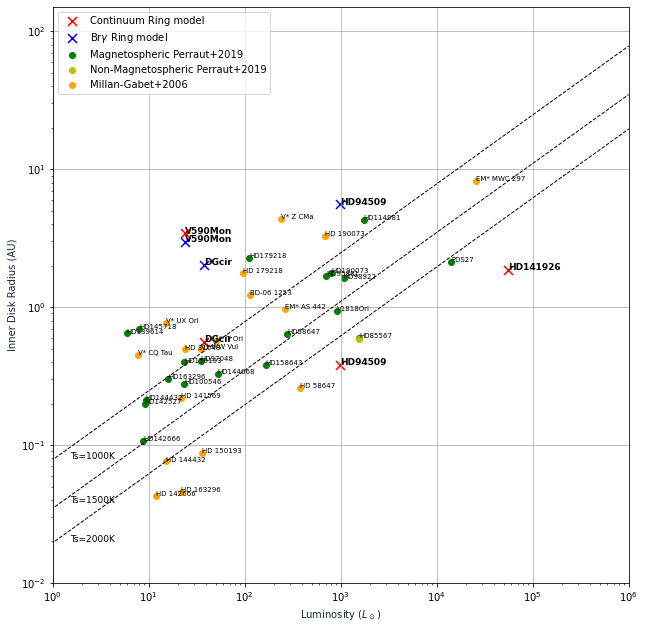

In [102]:
import seaborn as sns
luminosity=np.power(10,log_luminosity)

#Data from Perraut+2019
table3_perraut_2019 = pd.read_csv("./table3_perraut_2019.csv", sep=';', header=0)
table3_perraut_2019_non_magnetic = pd.read_csv("./table3_perraut_2019_non_magnetosferic.csv", sep=';', header=0)
    
disk_radius_perraut = disk_size_calculator(table3_perraut_2019['FWHM(mas)']/2,table3_perraut_2019['distance_pc'])
table3_perraut_2019['disk_radius']=pd.Series(disk_radius_perraut)
luminosity_perraut=np.power(10,table3_perraut_2019['log_L'])
luminosity_perraut_non_magnetosferic=np.power(10,table3_perraut_2019_non_magnetic['log_L'])

#Data from Millan-Gabet+2006
table4_millan_gabet_2006 = pd.read_csv("./table4_millan_2006.csv", sep=';', header=0)

disk_radius_millan = disk_size_calculator(table4_millan_gabet_2006['Rd(mas)'],table4_millan_gabet_2006['distance_pc'])
table4_millan_gabet_2006['disk_radius']=pd.Series(disk_radius_millan)
log_luminosity_millan = table4_millan_gabet_2006['logL(Lsun)']
luminosity_millan = np.power(10,log_luminosity_millan)

    
fig = plt.figure(figsize=(10, 10))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

#axes.scatter(luminosity, egauss_model_results['disk_radius_cont'],label='Continuum Gaussian model', color='r')
#axes.scatter(luminosity, egauss_model_results['disk_radius_Brg'],label='Br$\gamma$ Gaussian model', color='b')
axes.scatter(np.power(10,ering_model_results['log_luminosity']), ering_model_results['width_cont'],label='Continuum Ring model', color='r', marker='x',s=80)
axes.scatter(np.power(10,ering_model_results['log_luminosity']), ering_model_results['width_Brg'],label='Br$\gamma$ Ring model', color='b', marker='x',s=80)

#axes.scatter(estimated_luminosity, estimated_inner_disk,label='Jorge\'s inner disk estimation', color='g')
axes.scatter(luminosity_perraut,table3_perraut_2019['disk_radius'],label='Magnetospheric Perraut+2019', color='g')
axes.scatter(luminosity_perraut_non_magnetosferic,table3_perraut_2019_non_magnetic['FWHM(mas)']/2,label='Non-Magnetospheric Perraut+2019', color='y')
axes.scatter(luminosity_millan,disk_radius_millan,label='Millan-Gabet+2006', color='orange')

def inner_disk_radius(Lstar, Ts):
    result = 1.1*np.sqrt(Lstar/1000)*(1500/Ts)**2
    return result

Lstar = np.linspace(-1,1000000,1000000)

axes.plot(Lstar, inner_disk_radius(Lstar,1000 ),'--', linewidth=1, color='black')
axes.plot(Lstar, inner_disk_radius(Lstar,1500 ),'--', linewidth=1, color='black')
axes.plot(Lstar, inner_disk_radius(Lstar,2000 ),'--', linewidth=1, color='black')

axes.set_xlabel('Luminosity ($L_\odot$)', color='#1C2833')
axes.set_ylabel('Inner Disk Radius (AU)', color='#1C2833')
axes.set_yscale('log')
axes.set_xscale('log')
axes.legend(loc='upper left')
axes.grid()

xlim = [1, 1000000]
axes.set_xlim(xlim)
ylim = [0.01, 150]
axes.set_ylim(ylim)

plt.text(1.5, 0.08, 'Ts=1000K', fontsize=9)
plt.text(1.5, 0.038, 'Ts=1500K', fontsize=9)
plt.text(1.5, 0.02, 'Ts=2000K', fontsize=9)

#Label each data
for i,type in enumerate(names):
    if(~np.isnan(np.power(10,ering_model_results['log_luminosity'][i])) and (ering_model_results['width_cont'][i] >0.1) ):
        plt.text(np.power(10,ering_model_results['log_luminosity'][i]), ering_model_results['width_cont'][i], names[i], weight='bold', fontsize=9)
    if(~np.isnan(np.power(10,ering_model_results['log_luminosity'][i])) and (ering_model_results['width_Brg'][i] >0.1) ):
        plt.text(np.power(10,ering_model_results['log_luminosity'][i]), ering_model_results['width_Brg'][i], names[i], weight='bold', fontsize=9)
for i,type in enumerate(table3_perraut_2019['Object']):
    plt.text(luminosity_perraut[i], table3_perraut_2019['disk_radius'][i], table3_perraut_2019['Object'][i], fontsize=7)

for i,type in enumerate(table4_millan_gabet_2006['Object']):
    plt.text(luminosity_millan[i], table4_millan_gabet_2006['disk_radius'][i], table4_millan_gabet_2006['Object'][i], fontsize=7)
    
#Save figure to disk
fig.savefig('./figures/figure_luminosity_disk_radius.eps', dpi=300)


## Final products visualization
There are two options for final products visualization: *OIFits Explorer* and *GRAVIQL*.

### OIFits Explorer
This is a [JMMC](http://www.jmmc.fr/oifitsexplorer_page.htm) Java based OI FITS viewer that must be launched from the Applications menu.

![JMMC OIFits caption](./figures/OIFits_caption.png)


# MACROS

### Defined macros:

* Macro with continuum removal and incluiding LITpro model results:
```console
%macro w_cont_model 1-28 31
```
* Macro without continuum removal and incluiding LITpro model results:
```console
%macro wo_cont_model 1-13 16-28 31
```
* Macro without continuum removal and without LITpro model results:
```console
%macro wo_cont_wo_model 1-13 16-19
```
* Macro with continuum removal and without LITpro model results:
```console
%macro w_cont_wo_model 1-19
```


### Commands to load stored macros:
```console
%store -r w_cont_model
%store -r wo_cont_model
%store -r wo_cont_wo_model
%store -r w_cont_wo_model
```

### Commands to launch loaded macros:
```console
w_cont_model
wo_cont_model
wo_cont_wo_model
w_cont_wo_model
```



In [103]:
%store -r w_cont_model

In [104]:
%store -r w_cont_model
w_cont_model

IPython.macro.Macro('# This line configures matplotlib to show figures embedded in the notebook, \n# instead of opening a new window for each figure. More about that later. \n# If you are using an old version of IPython, try using \'%pylab inline\' instead.\n\nget_ipython().run_line_magic(\'matplotlib\', \'inline\')\n\n#%matplotlib qt\n#Import modules\nimport numpy as np\nimport pandas as pd\nimport gravity_plots_generator as gpg\nfrom gravi_plot_functions import *\nimport matplotlib.gridspec as gridspec\n\nmiV590Mon = gpg.InputStar(\'V590Mon\')\nmiPDS281 = gpg.InputStar(\'PDS281\')\nmiHD94509 = gpg.InputStar(\'HD94509\')\nmiDGCir = gpg.InputStar(\'DGCir\')\nmiHD141926 = gpg.InputStar(\'HD141926\')\n\nall_sources = [miV590Mon,miPDS281,miHD94509,miDGCir,miHD141926]\n# This line configures matplotlib to show figures embedded in the notebook, \n# instead of opening a new window for each figure. More about that later. \n# If you are using an old version of IPython, try using \'%pylab inlin

# ONLY FOR TESTING PURPOSES!!

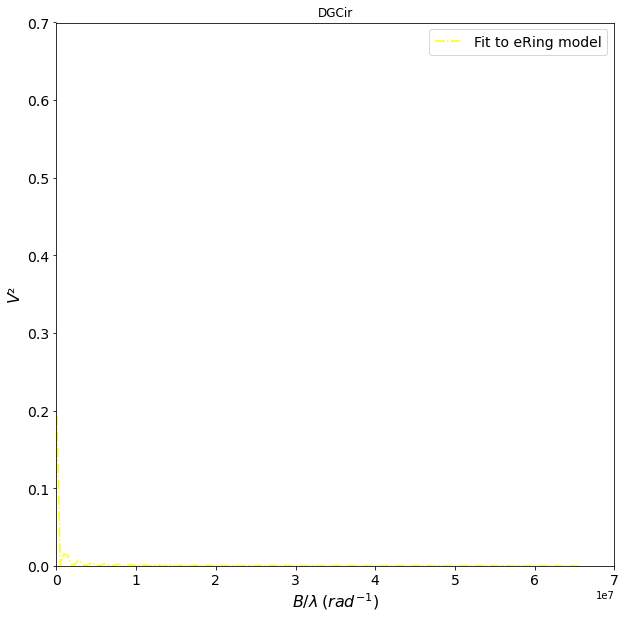

In [105]:
import scipy 

##Get baselines values B/lambda 
baseline_A = {}
baseline_B = {}
baseline = {}
for  key, value in miDGCir.uV2_A.items():
    baseline_A[key] = sqrt(miDGCir.uV2_A[key]**2 + miDGCir.vV2_A[key]**2)
    baseline_B[key] = sqrt(miDGCir.uV2_B[key]**2 + miDGCir.vV2_B[key]**2)
    baseline[key] = mean([baseline_A[key],baseline_B[key]])


# Read fitting data from automeris .csv file  
# (in the LITpro_output directory)  
LITpro_continuum_visibility2 = pd.read_csv("./LITpro_output/"+miDGCir.source+"_cont_LITpro_fit.tsv", sep='\t', header=3)
LITpro_Brg_visibility2 = pd.read_csv("./LITpro_output/"+miDGCir.source+"_Brg_LITpro_fit.tsv", sep='\t', header=3)

LITpro_continuum_visibility2=LITpro_continuum_visibility2.sort_values(by=['#x'])
wave_LITpro = LITpro_continuum_visibility2['#x'].to_numpy()
modelValue_LITpro = LITpro_continuum_visibility2['modelValue'].to_numpy()

LITpro_Brg_visibility2=LITpro_Brg_visibility2.sort_values(by=['#x'])
#wave_LITpro = LITpro_Brg_visibility2['#x'].to_numpy()
#modelValue_LITpro = LITpro_Brg_visibility2['modelValue'].to_numpy()

# Read fitting data from LITpro .tsv file  
# (in the same directory than gravi_plot_genereator.py)
fitted_continuum_visibility2 = pd.read_csv("./LITpro_output/"+miDGCir.source+"_automeris_cont.csv", sep=';', header=0)
fitted_Brg_visibility2 = pd.read_csv("./LITpro_output/"+miDGCir.source+"_automeris_Brg.csv", sep=';', header=0)

#Sort, just in case 
fitted_continuum_visibility2=fitted_continuum_visibility2.sort_values(by=['X_data'])
fitted_Brg_visibility2=fitted_Brg_visibility2.sort_values(by=['X_data'])

wave_cont = fitted_continuum_visibility2['X_data'].to_numpy()
modelValue_cont = fitted_continuum_visibility2['Y_data'].to_numpy()

wave_Brg = fitted_Brg_visibility2['X_data'].to_numpy()
modelValue_Brg = fitted_Brg_visibility2['Y_data'].to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))

#i=0
#for  key, value in miDGCir.visibility2.items():
#    #Generate interpolated model fitting values
#    ax.errorbar(baseline[key]*1000000/miDGCir.Brg, miDGCir.continuum_visibility2[key], yerr=miDGCir.continuum_visibility2_error[key], c='black',fmt='o', capthick=2, label='$V^2$ continuum data' if i == 0 else "")
#    
#    if i == 0:
#        ax.plot(wave_cont,modelValue_cont, '--', color='black',label='Fit to $V^2$ continuum model')
#        ax.plot(wave_Brg,modelValue_Brg, '-.', color='green',label='Fit to $V^2 Br\gamma$ model')
#        #ax.scatter(fitted_continuum_visibility2[['#x']], fitted_continuum_visibility2[['dataValue']],label=' $V^2$ Data')
#        ax.scatter(LITpro_continuum_visibility2[['#x']], LITpro_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='grey', marker='$o$')
#        ax.scatter(LITpro_Brg_visibility2[['#x']], LITpro_Brg_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ model', color='green', marker='+')
#
#    i=i+1
#    
ring_width = 1 #  in mas           
ring_width_rad = ring_width/206264.8 # in radians        

xdata = np.linspace(min(wave_Brg), max(wave_Brg), 150)


ax.plot(xdata,(scipy.special.j0(2*np.pi*ring_width_rad*xdata))**2, '-.', color='yellow',label='Fit to eRing model')

xlim=[0,7e7]
ylim=[0,0.7]
     
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title(str(miDGCir.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
    

In [106]:
import seaborn as sns
luminosity=np.power(10,log_luminosity)

#Data from Perraut+2019
table3_perraut_2019 = pd.read_csv("./table3_perraut_2019.csv", sep=';', header=0)
table3_perraut_2019_non_magnetic = pd.read_csv("./table3_perraut_2019_non_magnetosferic.csv", sep=';', header=0)
    
disk_radius_perraut = disk_size_calculator(table3_perraut_2019['FWHM(mas)']/2,table3_perraut_2019['distance_pc'])
table3_perraut_2019['disk_radius']=pd.Series(disk_radius_perraut)
luminosity_perraut=np.power(10,table3_perraut_2019['log_L'])
luminosity_perraut_non_magnetosferic=np.power(10,table3_perraut_2019_non_magnetic['log_L'])

#Data from Millan-Gabet+2006
table4_millan_gabet_2006 = pd.read_csv("./table4_millan_2006.csv", sep=';', header=0)

disk_radius_millan = disk_size_calculator(table4_millan_gabet_2006['Rd(mas)'],table4_millan_gabet_2006['distance_pc'])
table4_millan_gabet_2006['disk_radius']=pd.Series(disk_radius_millan)
log_luminosity_millan = table4_millan_gabet_2006['logL(Lsun)']
luminosity_millan = np.power(10,log_luminosity_millan)

    
fig = plt.figure(figsize=(10, 10))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

#axes.scatter(luminosity, egauss_model_results['disk_radius_cont'],label='Continuum Gaussian model', color='r')
#axes.scatter(luminosity, egauss_model_results['disk_radius_Brg'],label='Br$\gamma$ Gaussian model', color='b')
#sns.set(style="darkgrid")plt.axes.scatter(np.power(10,ering_model_results['log_luminosity']), ering_model_results['width_cont'],label='Continuum Ring model')
#sns.set(style="darkgrid")plt.axes.scatter(np.power(10,ering_model_results['log_luminosity']), ering_model_results['width_Brg'],label='Br$\gamma$ Ring model')


sns.scatterplot(x="log_luminosity", y="width_cont", data=ering_model_results);

#axes.scatter(estimated_luminosity, estimated_inner_disk,label='Jorge\'s inner disk estimation', color='g')
sns.set(style="darkgrid")plt.axes.scatter(luminosity_perraut,table3_perraut_2019['disk_radius'],label='Magnetospheric Perraut+2019', color='g')
sns.set(style="darkgrid")plt.axes.scatter(luminosity_perraut_non_magnetosferic,table3_perraut_2019_non_magnetic['FWHM(mas)']/2,label='Non-Magnetospheric Perraut+2019', color='y')
sns.set(style="darkgrid")plt.axes.scatter(luminosity_millan,disk_radius_millan,label='Millan-Gabet+2006', color='orange')

def inner_disk_radius(Lstar, Ts):
    result = 1.1*np.sqrt(Lstar/1000)*(1500/Ts)**2
    return result

Lstar = np.linspace(-1,1000000,1000000)

axes.plot(Lstar, inner_disk_radius(Lstar,1000 ),'--', linewidth=1, color='black')
axes.plot(Lstar, inner_disk_radius(Lstar,1500 ),'--', linewidth=1, color='black')
axes.plot(Lstar, inner_disk_radius(Lstar,2000 ),'--', linewidth=1, color='black')

axes.set_xlabel('Luminosity ($L_\odot$)', color='#1C2833')
axes.set_ylabel('Inner Disk Radius (AU)', color='#1C2833')
axes.set_yscale('log')
axes.set_xscale('log')
axes.legend(loc='upper left')
axes.grid()

xlim = [1, 1000000]
axes.set_xlim(xlim)
ylim = [0.01, 150]
axes.set_ylim(ylim)

plt.text(1.5, 0.08, 'Ts=1000K', fontsize=9)
plt.text(1.5, 0.038, 'Ts=1500K', fontsize=9)
plt.text(1.5, 0.02, 'Ts=2000K', fontsize=9)

#Label each data
for i,type in enumerate(names):
    if(~np.isnan(np.power(10,ering_model_results['log_luminosity'][i])) and (ering_model_results['width_cont'][i] >0.1) ):
        plt.text(np.power(10,ering_model_results['log_luminosity'][i]), ering_model_results['width_cont'][i], names[i], weight='bold', fontsize=9)
    if(~np.isnan(np.power(10,ering_model_results['log_luminosity'][i])) and (ering_model_results['width_Brg'][i] >0.1) ):
        plt.text(np.power(10,ering_model_results['log_luminosity'][i]), ering_model_results['width_Brg'][i], names[i], weight='bold', fontsize=9)
for i,type in enumerate(table3_perraut_2019['Object']):
    plt.text(luminosity_perraut[i], table3_perraut_2019['disk_radius'][i], table3_perraut_2019['Object'][i], fontsize=7)

for i,type in enumerate(table4_millan_gabet_2006['Object']):
    plt.text(luminosity_millan[i], table4_millan_gabet_2006['disk_radius'][i], table4_millan_gabet_2006['Object'][i], fontsize=7)
    
#Save figure to disk
fig.savefig('./figures/figure_luminosity_disk_radius.eps', dpi=300)


SyntaxError: invalid syntax (<ipython-input-106-1b9ed11c6d34>, line 35)

In [ ]:
#DGCir

#Setting parameters
Brg = 2.166167e-6 
#wavelength = Brg
wavelength = 2.1534e-6 


#Projected baseline (projected_baseline_A) and Spatial frecuency (B/2*wavelength) calculated from telescopes distance (baseline), hour angle (HA) and wavelength
HA=-4.08 *pi/12
baseline=130.231
projected_baseline_A = baseline*cos(HA)

spatial_freq_A = 2* projected_baseline_A/(wavelength)
print('cos(HA) =', cos(HA))
print('projected_baseline_A: ',projected_baseline_A, 'm')
print('spatial_freq_A (B/lambda): ',spatial_freq_A,'[1/rad]')
print('spatial_freq_A (B/lambda): ',spatial_freq_A/206264806.2471,'[mas]')


#Projected baseline and Spatial frecuency (B/2*wavelength) calculated from u,v and wavelength with OIFITSExplores
#SP_bad=sqrt(17.323**2+58.745**2)
SF_explorer=sqrt(14.222**2+58.756**2)
#print('SP_bad',SP_bad,'Mlambda')
print('SF_explorer',SF_explorer,'Mlambda')
print('SF_explorer',SF_explorer*wavelength*1000000,'m')
print('')

#Projected baseline and Spatial frecuency (B/2*wavelength) calculated from u,v and wavelength on FITS files
SP = {}
spatial_freq_B = {}
projected_baseline_B = {}

for  key, value in miDGCir.uV2_A.items():
    SP[key]=sqrt((miDGCir.uV2_A[key])**2+(miDGCir.uV2_A[key])**2)
    
    spatial_freq_B[key] = 1/(2*SP[key])
    projected_baseline_B[key] = wavelength *  SP[key]

print('projected_baseline_B: ',projected_baseline_B ,' m')
print('spatial_freq_B = ',spatial_freq_B ,'[1/rad]')
print('SP = ',SP ,'m')



In [ ]:
#PDS281

#Setting parameters
Brg = 2.166167e-6 
#wavelength = Brg
wavelength = 2.1401e-6 


#Projected baseline (projected_baseline_A) and Spatial frecuency (B/2*wavelength) calculated from telescopes distance (baseline), hour angle (HA) and wavelength

HA=-1.20 *pi/12
baseline=130.15
projected_baseline_A = baseline*cos(HA)




In [ ]:

60.45*126.504/58.756
60.45*(wavelength*1000000)

In [ ]:
for source in all_sources:
    #Plot scatter (u,v) coverage
    for  key, value in source.uV2_A.items():
        axes[j].scatter( source.uV2_A[key],source.vV2_A[key],  marker="o", color='blue', facecolor="none", s=100, label='Obs. A' if key == 'U4U3' else "")


In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
print(df)

df.rename(columns={"A": "a", "B": "c"})

ering_model_table.rename(columns={"distance_pc":"d (pc)"})


In [ ]:


x_axis_lim = [2.15,2.18]
y_axis_lim =[0.75,1.75] 
continuum_range=[2.15,2.1652,2.168,2.18]
miV590Mon.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)

y_axis_lim = [0.75,1.75]
continuum_range=[2.14,2.1645,2.169,2.19]
miPDS281.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)

y_axis_lim = [0.75,1.75]
continuum_range=[2.15,2.1648,2.1663,2.18]
miHD94509.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)

y_axis_lim = [0.75,1.75]
continuum_range=[2.153,2.1652,2.1677,2.18]
miDGCir.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)

y_axis_lim = [0.75,2.1]
continuum_range=[2.14,2.1640,2.1677,2.19]
miHD141926.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)



In [ ]:
# Read fitting data from LITpro .tsv file  
# (in the same directory than gravi_plot_genereator.py)
import pandas
from scipy.interpolate import interp1d, splev,splrep, splprep

##Get baselines values B/lambda 
baseline_A = {}
baseline_B = {}
baseline = {}
for  key, value in miPDS281.uV2_A.items():
    baseline_A[key] = sqrt(miPDS281.uV2_A[key]**2 + miPDS281.vV2_A[key]**2)
    baseline_B[key] = sqrt(miPDS281.uV2_B[key]**2 + miPDS281.vV2_B[key]**2)
    baseline[key] = mean([baseline_A[key],baseline_B[key]])


fcontinuum_visibility2 = pandas.read_csv(miPDS281.source+"_cont_LITpro_fit.tsv", sep='\t', header=3)

fitted_continuum_visibility2=fcontinuum_visibility2.sort_values(by=['#x'])
wave = fitted_continuum_visibility2['#x'].to_numpy()
modelValue = fitted_continuum_visibility2['modelValue'].to_numpy()


#wave = np.append(0,wave)
#modelValue= np.append(1,modelValue)


mytck,myu=splprep([wave,modelValue], s=0)
xnew,ynew= splev(np.linspace(0,max(modelValue),10000),mytck)


fig, ax = plt.subplots(figsize=(10, 10))

i=0

for  key, value in miPDS281.visibility2.items():
    ax.errorbar(baseline[key]*1000000/miPDS281.Brg, miPDS281.continuum_visibility2[key], yerr=miPDS281.continuum_visibility2_error[key], fmt='bo', capthick=2, label='Continuum $V^2$' if i == 0 else "")
    if i == 0:
        ax.plot(xnew[100:],ynew[100:], '--', color='black',label='Fit to Modelled $V^2$')
        #ax.scatter(fitted_continuum_visibility2[['#x']], fitted_continuum_visibility2[['dataValue']],label=' $V^2$ Data')
        ax.scatter(fitted_continuum_visibility2[['#x']], fitted_continuum_visibility2[['modelValue']],label='$V^2$ Model ', color='red')
    i=i+1
    
ax.set_xlim()
ax.set_ylim([0,1.2])
ax.set_title('$B/\lambda$')
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=1)        


In [ ]:
# Read fitting data from LITpro .tsv file  
# (in the same directory than gravi_plot_genereator.py)
import pandas
from scipy.interpolate import interp1d, splev,splrep, splprep

##Get baselines values B/lambda 
baseline_A = {}
baseline_B = {}
baseline = {}
for  key, value in miPDS281.uV2_A.items():
    baseline_A[key] = sqrt(miPDS281.uV2_A[key]**2 + miPDS281.vV2_A[key]**2)
    baseline_B[key] = sqrt(miPDS281.uV2_B[key]**2 + miPDS281.vV2_B[key]**2)
    baseline[key] = mean([baseline_A[key],baseline_B[key]])


fitted_continuum_visibility2 = pandas.read_csv(miPDS281.source+"_automeris.csv", sep=';', header=0)
#Sort, just in case 
fitted_continuum_visibility2=fitted_continuum_visibility2.sort_values(by=['X_data'])

wave = fitted_continuum_visibility2['X_data'].to_numpy()
modelValue = fitted_continuum_visibility2['Y_data'].to_numpy()


fig, ax = plt.subplots(figsize=(10, 10))

i=0

for  key, value in miPDS281.visibility2.items():
    ax.errorbar(baseline[key]*1000000/miPDS281.Brg, miPDS281.continuum_visibility2[key], yerr=miPDS281.continuum_visibility2_error[key], fmt='bo', capthick=2, label='Continuum $V^2$' if i == 0 else "")
    if i == 0:
        ax.plot(wave,modelValue, '--', color='black',label='Fit to Modelled $V^2$')
        #ax.scatter(fitted_continuum_visibility2[['#x']], fitted_continuum_visibility2[['dataValue']],label=' $V^2$ Data')
        #ax.scatter(fitted_continuum_visibility2[['X_data']], fitted_continuum_visibility2[['Y_data']],label='$V^2$ Model ', color='red')
    i=i+1
    
ax.set_xlim()
ax.set_ylim([0,1.2])
ax.set_title('$B/\lambda$')
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=1)        


In [ ]:
import pandas as pd

fitted_continuum_visibility2 = pandas.read_csv(miHD94509.source+"_automeris.csv", sep=';', header=0)
#wave = fitted_continuum_visibility2['Y_data'].to_numpy()
df = pd.DataFrame(data=fitted_continuum_visibility2)
print(fitted_continuum_visibility2[' Y_data'])
df.dtypes

In [ ]:
%matplotlib inline
#Import modules
import numpy as np
from gravi_plot_functions import *
import gravity_plots_generator as gpg

miV590Mon = gpg.InputStar('V590Mon')
miPDS281 = gpg.InputStar('PDS281')
miHD94509 = gpg.InputStar('HD94509')
miDGCir = gpg.InputStar('DGCir')
miHD141926 = gpg.InputStar('HD141926')

miV590Mon.figure_badpixel_flux_preprocessing()
miPDS281.figure_badpixel_flux_preprocessing()
miHD94509.figure_badpixel_flux_preprocessing()
miDGCir.figure_badpixel_flux_preprocessing()
miHD141926.figure_badpixel_flux_preprocessing()

miV590Mon.figure_badpixel_calibration_preprocessing()
miPDS281.figure_badpixel_calibration_preprocessing()
miHD94509.figure_badpixel_calibration_preprocessing(0.5)
miDGCir.figure_badpixel_calibration_preprocessing(0.5)
miHD141926.figure_badpixel_calibration_preprocessing(0.5)


#Replace NaN in BPcorrected_flux 
miV590Mon.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miV590Mon.BPcorrected_flux,10)
miPDS281.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miPDS281.BPcorrected_flux,10)
miHD94509.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD94509.BPcorrected_flux,10)
miDGCir.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miDGCir.BPcorrected_flux,10)
miHD141926.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD141926.BPcorrected_flux,10)

#Replace NaN in visibility2 
for key,value in miV590Mon.visibility2.items():
    miV590Mon.visibility2[key]=replace_nans_by_interpolated_gaussian(miV590Mon.visibility2[key],5)
for key,value in miPDS281.visibility2.items():
    miPDS281.visibility2[key]=replace_nans_by_interpolated_gaussian(miPDS281.visibility2[key],5)
for key,value in miHD94509.visibility2.items():
    miHD94509.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD94509.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miDGCir.visibility2[key]=replace_nans_by_interpolated_gaussian(miDGCir.visibility2[key],5)
for key,value in miHD141926.visibility2.items():
    miHD141926.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD141926.visibility2[key],5)

    
#Replace NaN in diff_phase 
for key,value in miV590Mon.diff_phase.items():
    miV590Mon.diff_phase[key]=replace_nans_by_interpolated_gaussian(miV590Mon.diff_phase[key],5)
for key,value in miPDS281.diff_phase.items():
    miPDS281.diff_phase[key]=replace_nans_by_interpolated_gaussian(miPDS281.diff_phase[key],5)
for key,value in miHD94509.diff_phase.items():
    miHD94509.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD94509.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miDGCir.diff_phase[key]=replace_nans_by_interpolated_gaussian(miDGCir.diff_phase[key],5)
for key,value in miHD141926.diff_phase.items():
    miHD141926.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD141926.diff_phase[key],5)

    
#y_axis_lim =[0.75,1.75] 
#x_axis_lim = [2.13,2.17]
#x_axis_lim = [2.13,2.2]
#continuum_range=[2.14,2.1604]
#miV590Mon.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)
#
#y_axis_lim = [0.75,1.75]
#x_axis_lim = [2.13,2.17]
#x_axis_lim = [2.13,2.2]
#continuum_range=[2.131,2.161]
##miPDS281.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)
#
#y_axis_lim = [0.75,1.75]
#x_axis_lim = [2.13,2.17]
#x_axis_lim = [2.13,2.2]
#continuum_range=[2.1485,2.1644]
#miHD94509.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)
#
#y_axis_lim = [0.75,1.75]
#x_axis_lim = [2.13,2.17]
#x_axis_lim = [2.13,2.2]
#continuum_range=[2.153,2.163]
#miDGCir.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)
#
x_axis_lim = [2.135,2.195]
y_axis_lim = [0.75,2.1]
continuum_range=[2.14,2.16,2.17,2.19]
miHD141926.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)



x_axis_lim = [2.13,2.2]
y_axis_lim = [0.0,1.5]
continuum_range=[2.153,2.163]
miHD141926.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range)

line_range=[2.1638,2.168]
y_axis_lim = [0.6,1.4]
y_axis_lim = [0,3]
miHD141926.figure_continuum_corrector(x_axis_lim,y_axis_lim,line_range)



flux_ylim=[0.75,1.85]
visibility_ylim = [0.6,1.3]
diff_phase_ylim = [-10,10]
flux_yticks=np.arange(1,1.6,0.5)
visibility_yticks =np.arange(0.8,1.3,0.2)
diff_phase_yticks =np.arange(-5,10,5)
miHD141926.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks)

x_axis_lim = [2,2.4]
flux_ylim = [0.9,7.7] 
zoom_lower_xlim =2.163
zoom_higher_xlim = 2.170
zoom_ylim = [0.9,1.5] 
save_figure = False
miHD141926.figure_full_bandwidth_flux(x_axis_lim,flux_ylim, zoom_lower_xlim,zoom_higher_xlim,zoom_ylim,save_figure)


In [ ]:

x_axis_lim = [1.98,2.46]
flux_ylim = [0,18000] 
zoom_lower_xlim =2.163
zoom_higher_xlim = 2.170
zoom_ylim = [10000,18000] 
save_figure = False
miHD141926.figure_full_bandwidth_flux(x_axis_lim,flux_ylim, zoom_lower_xlim,zoom_higher_xlim,zoom_ylim,save_figure)


In [ ]:
#Set Gaia distances (in pc)
HD141926_distance = 0.72
#Set LITpro modelled angular sizes
HD141926_angular_size = 0.4

HD141926_disk_radius = disk_size_calculator(HD141926_distance, HD141926_angular_size)

print(HD141926_disk_radius,' au')


#Set Gaia distances (in pc)

HD141926_distance = 0.72
HD141926_distance_error = 0.04

#Set LITpro modelled angular sizes
HD141926_angular_size = 0.4
HD141926_angular_size_error = 3  
    
HD141926_disk_radius, HD141926_disk_radius_error = disk_size_error_calculator(HD141926_distance, HD141926_distance_error, HD141926_angular_size, HD141926_angular_size_error)

print('$',HD141926_disk_radius,'\pm',HD141926_disk_radius_error)

#errores!!!

a = 5.96*0.13/1000
b= 1.14*0.4/1000

print(a+b)

In [ ]:
$0.0068\pm0.0012$
$0.0037\pm0.0004$
$0.0183\pm0.0011$
$0.00083\pm0.00026$
$0.00029\pm 0.0022$



In [ ]:
a = ones(10)
print(a[3])

a[3]=np.nan
print(a)
b=[x for x in a if ~np.isnan(x)]
print(len(a))
print(len(b))


In [ ]:
for key, value in miV590Mon.v2_A.items():
    print(key)
